<a href="https://colab.research.google.com/github/Lasya-1408/Hotel-booking-EDA/blob/main/NYC_Taxi_Trip_Duration_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC taxi trip time prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

The given dataset contains trip duration in seconds of rides taken by a taxi company in New York City (NYC) which includes id, vendor_id, pickup_datetime, dropoff_datetime,passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag. Here, target variable is trip duration and all other variables are considered independent variables. The correlation between few variables can be found to analyse the trip duration. From the provided dataset, univariate and bivariate analyses is performed to determine which factors have contributed to maximum trip duration, at what time of the day there were more number of bookings, which month they had most rides and many other factors which effect number of rides. After performing exploratory data analysis (EDA), we perform tasks like feature engineering, feature selection, splitting the data into train and test, model building, fit the data to algorithm of selected model, predict the outputs, calculating the error and r2 score, concluding whether the model is predicting accurate results or not.  

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset contains the details of each taxi ride taken place in the year 2016. To analyze trip duration with the help of univariate and bivariate analysis among the variables. To perform data visualizations using different plots and obtain conclusions. To check whether there is any relation among the variables which effect the trip duration. To build a model which predicts trip duration of NYC taxi.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [156]:
# Import Libraries

#For accessing data
import pandas as pd
#For visualisations
import matplotlib.pyplot as plt
import seaborn as sns
#For mathematical operations
import numpy as np
from numpy import math
# For transforming datetime format
from datetime import datetime
# To calculate distance using latitudes and longitudes
from geopy.distance import great_circle
# To understand the correlation between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

##For model building
# For normalizing and splitting of data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
# Linear Regression
from sklearn.linear_model import LinearRegression
# Lasso Regression
from sklearn.linear_model import Lasso
# Ridge Regression
from sklearn.linear_model import Ridge
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# XGBoost Regression
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
#Enabling drive access to google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#Copying the path of the file
path = '/content/drive/MyDrive/Datasets_Almabetter/NYC Taxi Data.csv'

#Reading the file
nyc = pd.read_csv(path)

### Dataset First View

In [5]:
# Dataset First Look
nyc

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Dataset Rows count
print('The number of rows are',len(nyc.index))

# Dataset Columns
print('The number of columns are',len(nyc.columns))

The number of rows are 1458644
The number of columns are 11


Given dataset has 1458644 rows and 11 columns

### Dataset Information

In [7]:
# Dataset Info
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
nyc.duplicated().sum()

0

It is to be concluded that in the given dataset, there are no duplicate values

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
nyc.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

 From the above cell, we can conclude that there are no null values in the given dataset, Hence, visualizing is not required

In [10]:
# Visualizing the missing values
# As there are no null values in the given dataset, visualizing is not required here.

### What did you know about your dataset?


1.   id -  A unique identifier for each trip (Categorical)
2.   vendor_id -  A code indicating the provider associating with trip (Numeric)
3.   pickup_datetime - Date and time when the trip has started (Categorical)
4.   dropoff_datetime - Date and time when the trip has ended (Categorical)
5.   passenger_count - Number of passengers in the vechicle during trip (Numeric)  
6.   pickup_longitude - Longitude where the trip has started (Numeric)
7.   pickup_latitude - Latitude where the trip has started (Numeric)
8.   dropoff_longitude - Longitude where the trip has ended (Numeric)
9.   dropoff_latitude - Latitude where the trip has ended (Numeric)
10.   store_and_fwd_flag - It indiactes whether the trip record is stored or not before sending it to vendor (Categorical)
*   Y indicates stored and forwarded to vendor
*   N indicates not stored and forwarded to vendor
11.   trip_duration - Total duration of trip (Numeric)


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
nyc.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
nyc.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [13]:
# Dataset Describe
nyc.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [14]:
#Printing first five rows of the dataset
nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [15]:
#Printing the last five rows of the dataset
nyc.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Variables Description



*   In the given dataset, we have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag columns which are of the type object.
*   Vendor id, passenger_count, and trip_duration are of type int.
*   pickup_longitude, dropoff_longitude, pickup_latitude, and dropoff_latitude are of the type int.
*   The target variable is trip duration.


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
print(nyc['id'].nunique())
nyc['id'].unique()

1458644


array(['id2875421', 'id2377394', 'id3858529', ..., 'id2304944',
       'id2714485', 'id1209952'], dtype=object)

In [17]:
nyc['vendor_id'].unique()

array([2, 1])

In [18]:
nyc['pickup_datetime'].unique()

array(['2016-03-14 17:24:55', '2016-06-12 00:43:35',
       '2016-01-19 11:35:24', ..., '2016-01-10 07:35:15',
       '2016-04-22 06:57:41', '2016-01-05 15:56:26'], dtype=object)

In [19]:
nyc['dropoff_datetime'].unique()

array(['2016-03-14 17:32:30', '2016-06-12 00:54:38',
       '2016-01-19 12:10:48', ..., '2016-04-22 07:10:25',
       '2016-01-05 16:02:39', '2016-04-05 14:47:43'], dtype=object)

In [20]:
nyc['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

*  id column has 1458644 unique values which is also equal to the number of rows.
*  vendor_id has 2 unique values 1 and 2.
*  From pickup_datetime and dropoff_datetime columns, features like month, day, time can be extracted.
*  store_and_fwd_flag has 2 unique values N and Y.

## 3. ***Data Wrangling***

### Data Wrangling Code

Delete column id from the dataset as it has 1458644 unique values which is nothing but number of rows, therefore we can neglect id.


In [21]:
# Write your code to make your dataset analysis ready.

columns_present = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration']

columns_present.remove('id')
columns_present

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

Now we calculate distance between given latitudes and longitudes so that it will be convenient for us in model building and obtaining more insights from the data.

In [22]:
# calculate distance from given latitudes and longitudes.
from geopy.distance import great_circle

def distance_cal(pickup_lat, pickup_long, dropoff_lat, dropoff_long):

 starting_point=(pickup_lat,pickup_long)
 dropping_point=(dropoff_lat,dropoff_long)

 return great_circle(starting_point,dropping_point).km


In [23]:
nyc['distance'] = nyc.apply(lambda x: distance_cal(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1 )

After calculating the distance, we have other two columns which gives pickup and drop time. From these columns, we extract month, day, and time so that if will be helpful in visualizing and model bulding.

In [24]:
# convert pickup and drop datetime to year, month, day, part of the day
from datetime import date
nyc['pickup_datetime'] = pd.to_datetime(nyc['pickup_datetime'])
nyc['dropoff_datetime'] = pd.to_datetime(nyc['dropoff_datetime'])  #converting string to datetime data type

In [25]:
# Month
nyc['pickup_month_number'] = nyc['pickup_datetime'].dt.month
nyc['dropoff_month_number'] = nyc['dropoff_datetime'].dt.month

# Day name
nyc['pickup_dayname'] = nyc['pickup_datetime'].dt.day_name()
nyc['dropoff_dayname'] = nyc['dropoff_datetime'].dt.day_name()

# Day number
nyc['pickup_daynum'] = nyc['pickup_datetime'].apply(lambda r:r.day)
nyc['dropoff_daynum']=nyc['dropoff_datetime'].apply(lambda r:r.day)

# Hour
nyc['pickup_hour'] = nyc['pickup_datetime'].dt.hour
nyc['dropoff_hour'] = nyc['dropoff_datetime'].dt.hour

#Weekday
nyc['pickup_weekday'] = nyc['pickup_datetime'].dt.weekday
nyc['dropoff_weekday'] = nyc['dropoff_datetime'].dt.weekday

In [26]:
# Aggregating time into morning, afternoon, and evening
# 6 AM to 11:59 AM -> Morning
# 12 PM to 16:59 PM -> Afternoon
# 17 PM to 22 PM -> Evening

def day_time(a):

  if a >= 6 and a < 12:
    return 'Morning'
  elif a >= 12 and a < 17:
    return 'Afternoon'
  elif a >=17 and a <= 22:
    return 'Evening'
  else:
    return 'Late night'


In [27]:
nyc['pickup_time'] = nyc['pickup_hour'].apply(day_time)
nyc['dropoff_time'] = nyc['dropoff_hour'].apply(day_time)

In [28]:
# Copying the dataset, so that original dataset is not lost
nyc_df = nyc.copy()

In [29]:
# First look of the copied dataset
nyc_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_dayname,dropoff_dayname,pickup_daynum,dropoff_daynum,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_time,dropoff_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,14,14,17,17,0,0,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,12,12,0,0,6,6,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,19,19,11,12,1,1,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,6,6,19,19,2,2,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,26,26,13,13,5,5,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,Friday,Friday,8,8,13,13,4,4,Afternoon,Afternoon
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,Sunday,Sunday,10,10,7,7,6,6,Morning,Morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,Friday,Friday,22,22,6,7,4,4,Morning,Morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,Tuesday,Tuesday,5,5,15,16,1,1,Afternoon,Afternoon


We drop pickup_datetime and dropoff_datetime as information given in these columns is extracted and included in the dataset. Also, id is not required since it has all the unique values.

In [30]:
nyc_df.drop(['pickup_datetime', 'dropoff_datetime', 'id'], axis=1, inplace = True)

In [31]:
nyc_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_month_number,...,pickup_dayname,dropoff_dayname,pickup_daynum,dropoff_daynum,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_time,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,3,...,Monday,Monday,14,14,17,17,0,0,Evening,Evening
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,6,...,Sunday,Sunday,12,12,0,0,6,6,Late night,Late night
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,1,...,Tuesday,Tuesday,19,19,11,12,1,1,Morning,Afternoon
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,4,...,Wednesday,Wednesday,6,6,19,19,2,2,Evening,Evening
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,3,...,Saturday,Saturday,26,26,13,13,5,5,Afternoon,Afternoon


In [32]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month_number,dropoff_month_number,pickup_daynum,dropoff_daynum,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.440869e+00,3.516818e+00,3.517178e+00,1.550402e+01,1.550448e+01,1.360648e+01,1.359890e+01,3.050375e+00,3.054422e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.296544e+00,1.681038e+00,1.681217e+00,8.703135e+00,8.703123e+00,6.399693e+00,6.483682e+00,1.954039e+00,1.956599e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.231838e+00,2.000000e+00,2.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.093720e+00,4.000000e+00,4.000000e+00,1.500000e+01,1.500000e+01,1.400000e+01,1.400000e+01,3.000000e+00,3.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.875343e+00,5.000000e+00,5.000000e+00,2.300000e+01,2.300000e+01,1.900000e+01,1.900000e+01,5.000000e+00,5.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.240910e+03,6.000000e+00,7.000000e+00,3.100000e+01,3.100000e+01,2.300000e+01,2.300000e+01,6.000000e+00,6.000000e+00


In [33]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1458644 non-null  int64  
 1   passenger_count       1458644 non-null  int64  
 2   pickup_longitude      1458644 non-null  float64
 3   pickup_latitude       1458644 non-null  float64
 4   dropoff_longitude     1458644 non-null  float64
 5   dropoff_latitude      1458644 non-null  float64
 6   store_and_fwd_flag    1458644 non-null  object 
 7   trip_duration         1458644 non-null  int64  
 8   distance              1458644 non-null  float64
 9   pickup_month_number   1458644 non-null  int64  
 10  dropoff_month_number  1458644 non-null  int64  
 11  pickup_dayname        1458644 non-null  object 
 12  dropoff_dayname       1458644 non-null  object 
 13  pickup_daynum         1458644 non-null  int64  
 14  dropoff_daynum        1458644 non-

### What all manipulations have you done and insights you found?

Initially, dataset has 1458644 rows and 11 columns.
*   Firstly, id column is removed as it contains as many number of rows as unique numbers.
*   Secondly, in the dataset we have pickup_latitudes, pickup_longitudes, dropoff_latitudes, and dropoff_longitudes from which we have extracted the distance between them.
*   Further we have pickup_time and dropoff_time from which day, month, time are extracted.
*   Then we copied the dataset to nyc_df so that the original data is not lost.
*   Finally, we have removed pickup_time and dropoff_time from nyc_df as they are no longer useful in visualization and model building.
*   Now the new dataset has 1458644 rows and 21 columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***1. Univariate Analysis***

## 1.1 Trip duration distribution

Text(0.5, 0, 'trip duration in seconds')

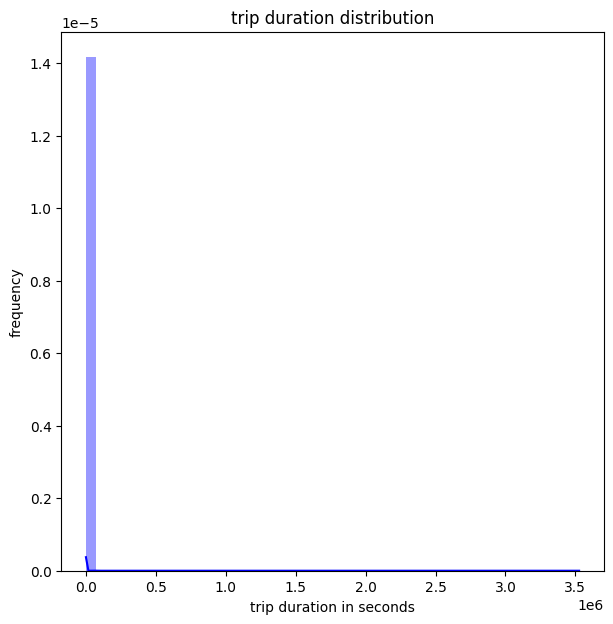

In [34]:
# Chart - 1 Visualization code
plt.figure(figsize=(7,7))
sns.distplot((nyc['trip_duration']),color="b")
plt.title('trip duration distribution')
plt.ylabel('frequency')
plt.xlabel('trip duration in seconds')

As we can see that the graph is highly skewed, therefore we apply log transformation or convert the trip duration which is in seconds to hours.

Text(0.5, 0, 'trip duration in seconds')

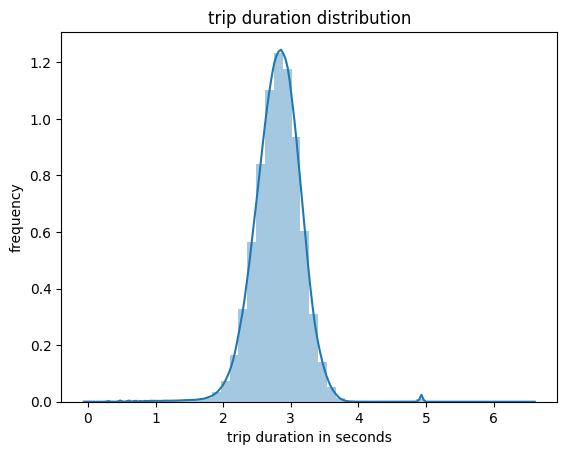

In [35]:
# Apply log transformation to trip duration
sns.distplot(np.log10(nyc_df['trip_duration']))
plt.title('trip duration distribution')
plt.ylabel('frequency')
plt.xlabel('trip duration in seconds')

##### 1. Why did you pick the specific chart?

A distribution plot is used for graphical representation of continuous variables. As trip duration is a continuous variable, to understand the distribution as in the shape and spread of the trip duration.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we notice that the distribution is normal. On splitting the trip duration into minutes, we can get more information about the trip duration.

### Trip duration distribution by splitting

In [36]:
nyc_df['trip_duration'].max()

3526282

In [37]:
def duration_min(x):

  if x <= 60:
    return 1
  elif x > 60 and x <= 120:
    return 2
  elif x > 120 and x <= 1800:
    return 30
  elif x > 1800 and x <= 3600:
    return 60
  elif x > 3600 and x <= 86400:
    return 1440
  elif x > 86400 and x <= 172800:
    return 2880
  else:
    return round(x/60,2)


In [38]:
nyc_df['trip_duration_split'] = nyc_df['trip_duration'].apply(duration_min)

Text(0.5, 0, 'trip duration in minutes')

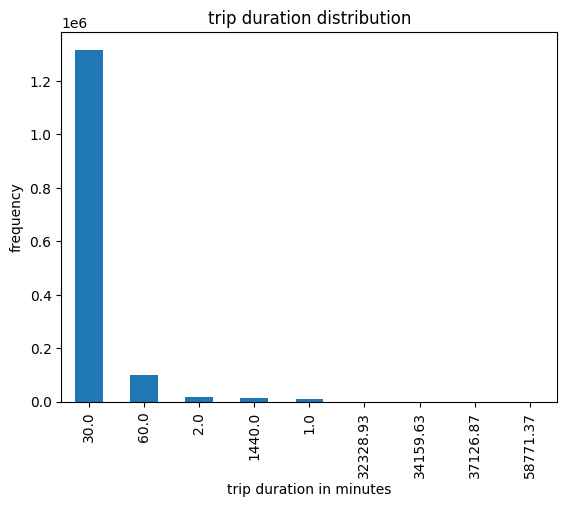

In [39]:
nyc_df['trip_duration_split'].value_counts().plot(kind = 'bar')
plt.title('trip duration distribution')
plt.ylabel('frequency')
plt.xlabel('trip duration in minutes')

##### 1. Why did you pick the specific chart?

To understand trip duration distribution more accurately, it is divided into categories, hence trip duration split is categorical variable. Therefore, a bar plot is chosen to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we notice that more number of rides are of 30 min duration.

## 1.2 Vendor id

Text(0.5, 0, 'vendor id type')

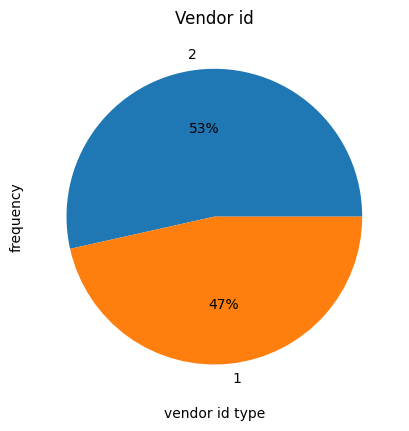

In [40]:
# Chart - 2 visualization code
nyc_df['vendor_id'].value_counts().plot(kind = 'pie', autopct="%.0f%%")
plt.title('Vendor id')
plt.ylabel('frequency')
plt.xlabel('vendor id type')

##### 1. Why did you pick the specific chart?

As the vendor id is a categorical variable, either pie or bar plot can be selected. Since there are only two categories, pie plot is selected by including percentages of each category.

##### 2. What is/are the insight(s) found from the chart?

From the above pie plot we observed that vendor id 1 and 2 contributes 47% and 53% respectively.Hence, We see that there is not much difference between both the vendors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, both the vendors are actively participating in taking rides which is a positive impact on the business.

##1.3 Passenger count distribution

Text(0.5, 0, 'Passenger count')

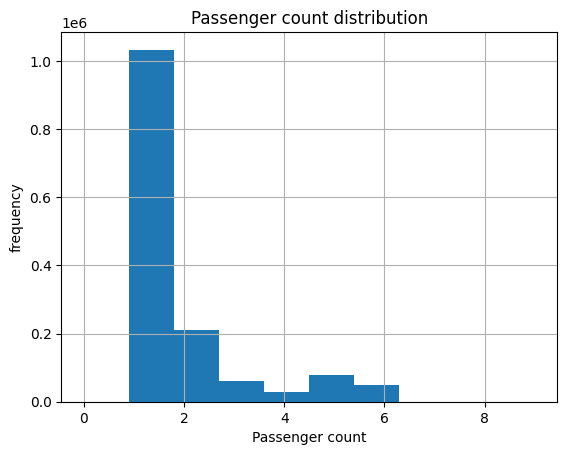

In [41]:
# Chart - 3 visualization code

nyc_df['passenger_count'].hist()
plt.title('Passenger count distribution')
plt.ylabel('frequency')
plt.xlabel('Passenger count')

In [42]:
nyc_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

##### 1. Why did you pick the specific chart?

A representation of the distribution of a continuous variable is called a histogram. It counts the number of data points that fall into each interval after dividing the variable's range into discrete intervals. Since passenger count is a continous variable, histogram is chosen.

##### 2. What is/are the insight(s) found from the chart?

* From the above histogram, it is observed that the maximum number of trips
contain 1 to 2 passengers and maximum number of passengers traveled in a trip is around 6.
* From the value counts we see that there are few rows in which the number of passengers entered was zero and very less number of trips had 7, 8 and 9 passengers. These rows can be deleted while model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, less number of passengers are the ones who might be going for work on a daily basis as the number of trips are more. The trips which has more number of passengers can be the longest trip as they might be going for a holiday. Moreover, relationship between passenger count and trip duration gives us more detailed information about the patterns involved.

##1.4 Stored and fwd flag distribution

Text(0.5, 0, 'stored and forwarded info')

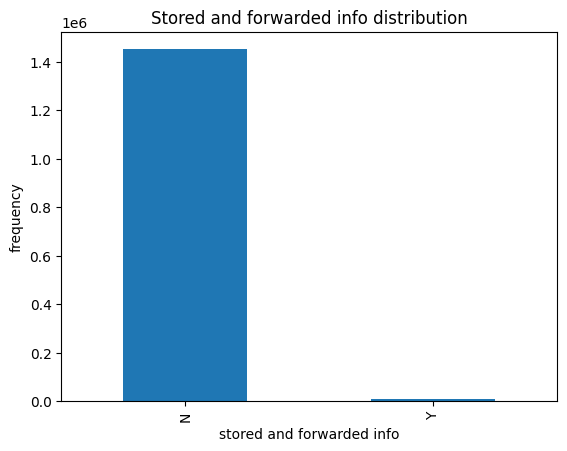

In [43]:
# Chart - 4 visualization code
nyc_df['store_and_fwd_flag'].value_counts().plot(kind = 'bar')
plt.title('Stored and forwarded info distribution')
plt.ylabel('frequency')
plt.xlabel('stored and forwarded info')

##### 1. Why did you pick the specific chart?

A bar plot is a data visualization that represents categorical data using rectangular bars. Each bar typically represents a category. Since store and fwd flag is a categorical variable, a bar plot is chosen to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observed that there are very few records which are stored are forwarded to vendor and most of them are not stored in the vechicles memory.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above observation, it can be concluded that trip information is not being stored in vechicles memory. It is a negative impact on business as it will be difficult to analyse the pattern in trips

##1.5 Distance distribution

Text(0.5, 0, 'Distance')

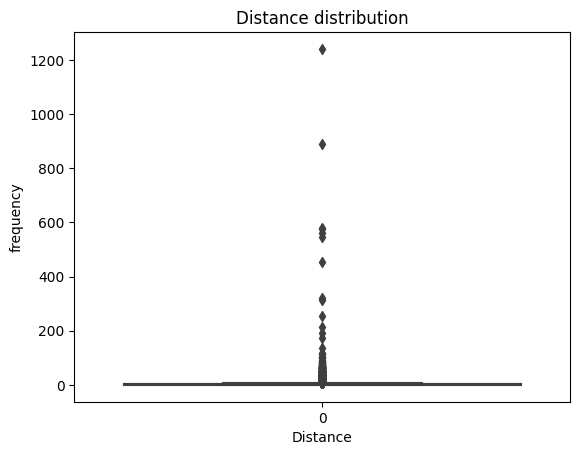

In [44]:
# Chart - 5 visualization code
sns.boxplot(nyc_df['distance'])
plt.title('Distance distribution')
plt.ylabel('frequency')
plt.xlabel('Distance')

In [45]:
nyc_df['distance'].value_counts()

0.000000    5897
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.917715       1
4.698058       1
4.920641       1
2.988820       1
1.134044       1
Name: distance, Length: 1452360, dtype: int64

##### 1. Why did you pick the specific chart?

To understand the distribution of continuous variable, box plot is used. As distance is continuous variable, boxplot is better to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the box plot, it is observed that for maximum number of trips distance is noted as zero. This may be due to not tracing the dropoff location or passengers may cancel the trip or may be technical error.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, as most of the rides have zero distance record, this may effect during data analysis as there is no proper entry of records, it will be difficult to analyse the data. Also, this may lead to legal consequences if the driver deliberately has not entered the data. In anyway the company has negative impact if the distance entered is zero.

##1.6 Pickup month number distribution

Text(0.5, 1.0, 'dropoff month count')

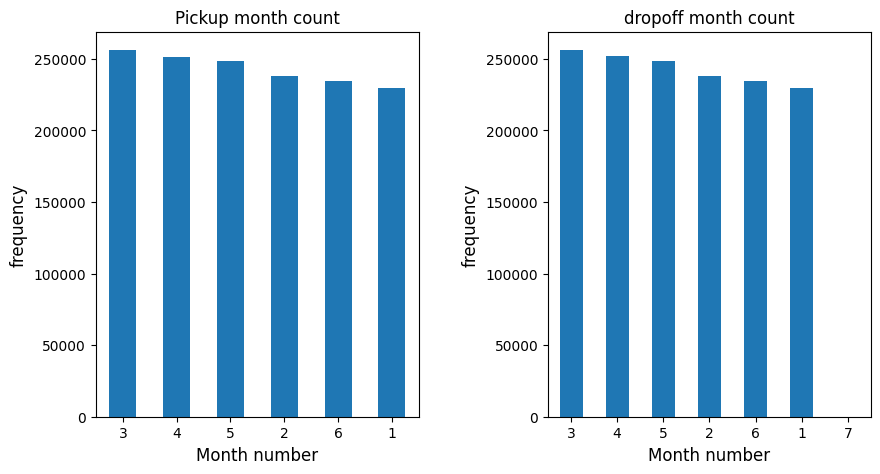

In [46]:
# Chart - 6 visualization code
a = nyc_df['pickup_month_number'].value_counts()
b = nyc_df['dropoff_month_number'].value_counts()



fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

a.plot(figsize = (10,5), kind = 'bar', ax=axs[0], rot=0)

b.plot(figsize = (10,5), kind = 'bar',ax=axs[1], rot=0)



axs[0].set_xlabel('Month number',fontsize=12)
axs[0].set_ylabel('frequency', fontsize=12)
axs[0].set_title('Pickup month count', fontsize=12)



axs[1].set_xlabel('Month number', fontsize=12)
axs[1].set_ylabel('frequency',  fontsize=12)
axs[1].set_title('dropoff month count', fontsize=12)



##### 1. Why did you pick the specific chart?

To understand which month has contributed to more rides, a bar chart is chosen as pickup month is a categorical variable, it is easy to visualize through bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot, comparatively march has maximum number of trips whereas january has minimum number of trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, prices can be raised during peak season that is march, april, and may. More offers can be given in month of january, february, and june so that more customers will be booking rides. This way a positive impact on business can be generated.

##1.7 Pickup day name distribution

Text(0.5, 1.0, 'dropoff day name count')

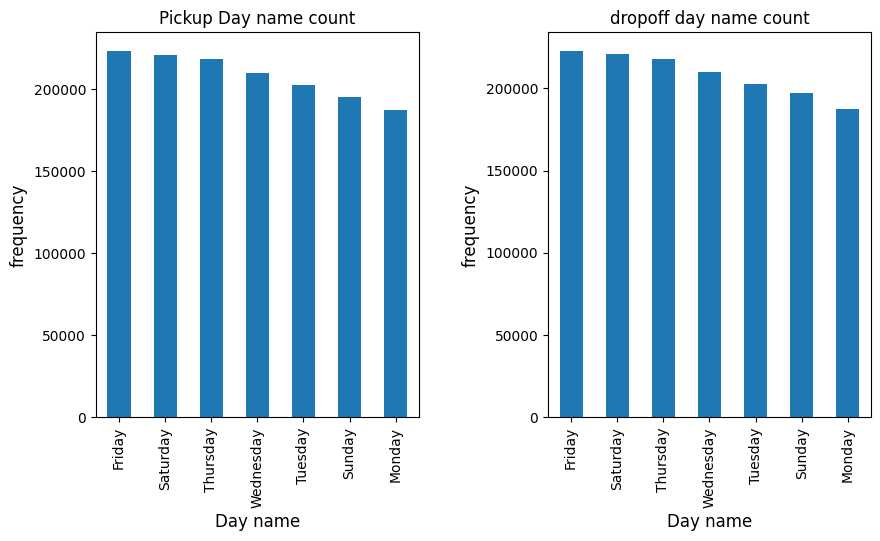

In [47]:
# Chart - 7 visualization code
a = nyc_df['pickup_dayname'].value_counts()
b = nyc_df['dropoff_dayname'].value_counts()



fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=2.5)

a.plot(figsize = (10,5), kind = 'bar', ax=axs[0])

b.plot(figsize = (10,5), kind = 'bar',ax=axs[1])



axs[0].set_xlabel('Day name',fontsize=12)
axs[0].set_ylabel('frequency', fontsize=12)
axs[0].set_title('Pickup Day name count', fontsize=12)



axs[1].set_xlabel('Day name', fontsize=12)
axs[1].set_ylabel('frequency',  fontsize=12)
axs[1].set_title('dropoff day name count', fontsize=12)


##### 1. Why did you pick the specific chart?

To understand which day has contributed to more rides, a bar chart is chosen as pickup day name is a categorical variable, it is easy to visualize through bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, the maximum number of rides are taken on Friday and then comes Saturday and Thursday whereas minimum number of rides are taken on Monday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, since Friday and Saturday are weekends, people often plan their outings on these days as they get more leisure time, that is the reason for maximum bookings. On monday and other weekdays, rides may be more active in the morning and evening. We can provide more offers on weekly or monthly basis as well for the working professionals so that more customers are attracted which shows a positive impact on business.

##1.8 Pickup time distribution

Text(0.5, 1.0, 'dropoff time count')

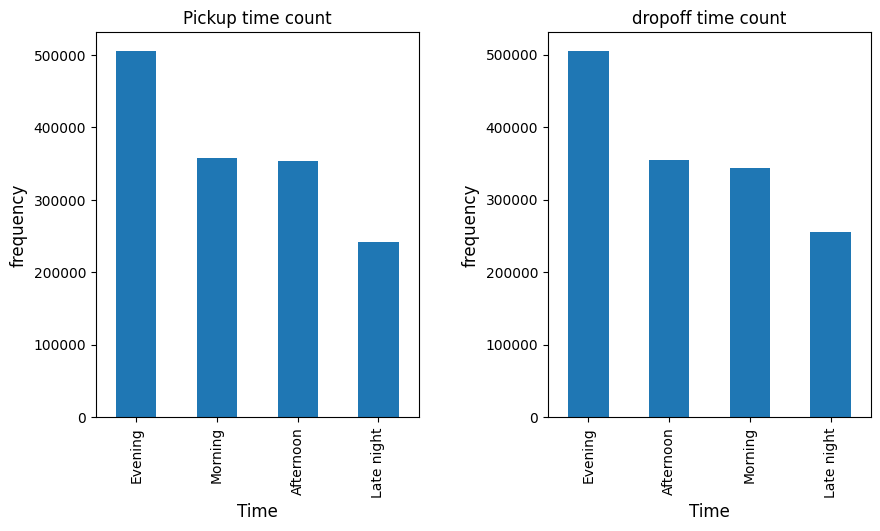

In [48]:
# Chart - 8 visualization code
a = nyc_df['pickup_time'].value_counts()
b = nyc_df['dropoff_time'].value_counts()



fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

a.plot(figsize = (10,5), kind = 'bar', ax=axs[0])

b.plot(figsize = (10,5), kind = 'bar',ax=axs[1])



axs[0].set_xlabel('Time',fontsize=12)
axs[0].set_ylabel('frequency', fontsize=12)
axs[0].set_title('Pickup time count', fontsize=12)



axs[1].set_xlabel('Time', fontsize=12)
axs[1].set_ylabel('frequency',  fontsize=12)
axs[1].set_title('dropoff time count', fontsize=12)

##### 1. Why did you pick the specific chart?

To understand which part of the day has more number of rides, a bar chart is chosen as pickup time is a categorical variable, it is easy to visualize through bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed that evenings are the busiest and least rides are happening during late night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, most rides are happening during evening as people often return from their office, so, it is obvious to understand, whereas during late nights few areas might not be safe to travel. Hence, it depends on place and individual work life.

## ***2. Bivariate Analysis***

##2.1 Number of trips made by vendors

Text(0.5, 1.0, 'Vendor id vs Trip duration')

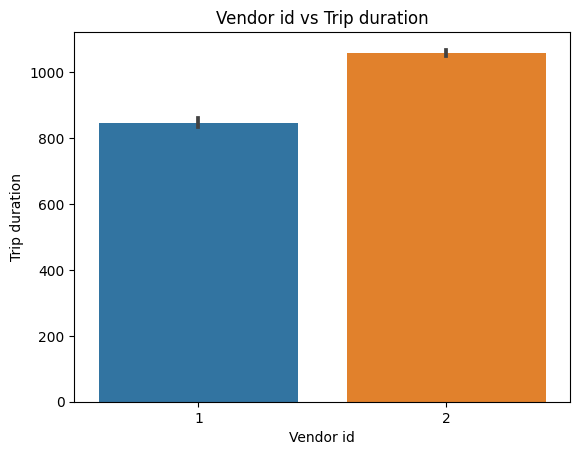

In [49]:
# Chart - 9 visualization code
sns.barplot(y='trip_duration',x='vendor_id',data=nyc_df)
plt.xlabel('Vendor id')
plt.ylabel('Trip duration')
plt.title('Vendor id vs Trip duration')

##### 1. Why did you pick the specific chart?

To understand the trip duration among the vendor id's , bar plot is chosen as vendor id is categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed that vendor id 2 takes longer trips than vendor id 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, vendor id 2 takes longer trips than vendor id 1. In case of vendor id 2, longer trips reduces waiting time, increases positive reviews, and higher fares, so taking longer trips creates a positive impact. In case of vendor id 1, Frequent stops and starts during short rides might lead to increased fuel costs, and reduced efficiency. Therefore, more number of short trips is a negative impact on business.

## 2.2 Sub plots of number of passengers travelled and distance covered in each trip

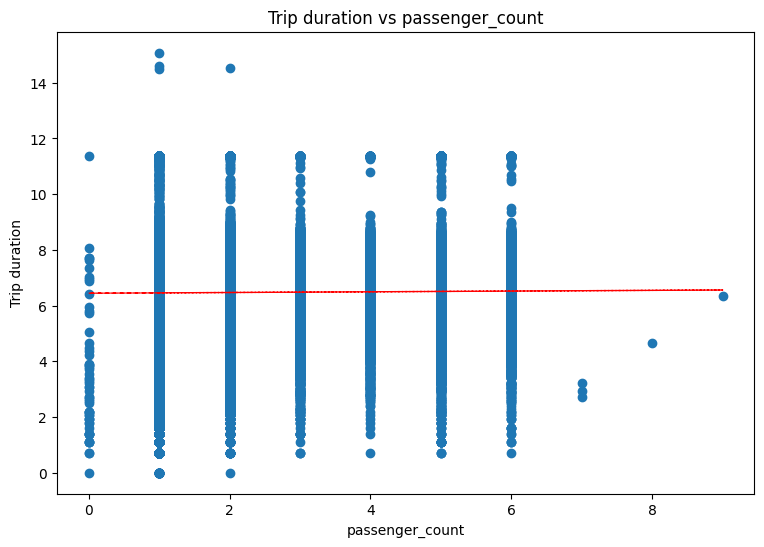

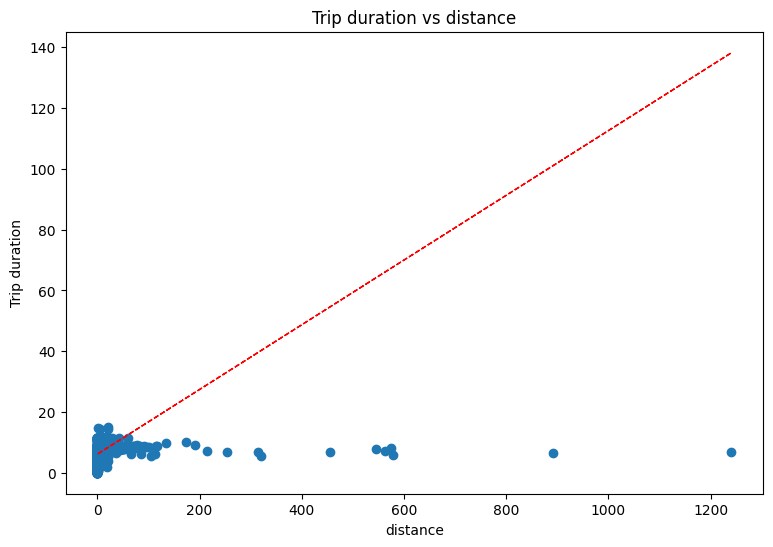

In [50]:
# Chart - 12 visualization code

Numeric_columns = ['passenger_count', 'distance']

for i in Numeric_columns:

  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  plt.scatter(x=nyc_df[i], y=np.log(nyc_df['trip_duration']))
  plt.xlabel(i)
  plt.ylabel('Trip duration')
  ax.set_title('Trip duration vs ' + i)

  #creating a polynomial equation of degree 1
  z = np.polyfit(nyc_df[i], np.log(nyc_df['trip_duration']), 1)

  #poly1d -> represents polynomial equation of degree 1 or less
  y_hat = np.poly1d(z)(nyc_df[i])

  # plotting predicted line
  plt.plot(nyc_df[i], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

To understand the relation among passenger count and distance with trip duration, a scatter plot is chosen as passenger count, distance and trip duration are continous variables. It is easy to notice the relation.

##### 2. What is/are the insight(s) found from the chart?

From passenger count vs trip duration, no clear relation is observed.
From distance vs trip duration, it is observed that there are trips with zero distance yet having a trip duration.

##2.3 Pickup day name vs Trip duration

Text(0.5, 1.0, 'Day name vs Trip duration')

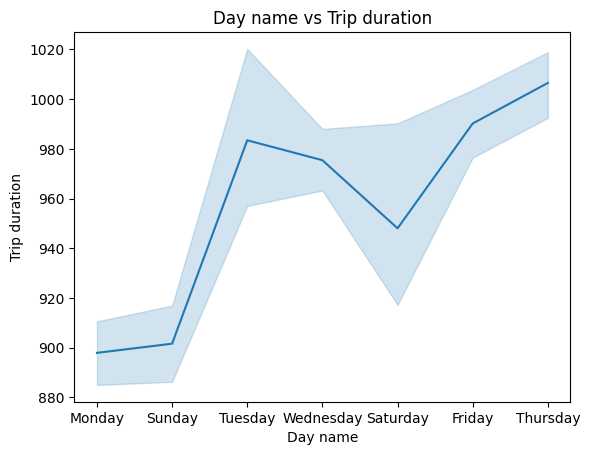

In [51]:
# Chart - 13 visualization code
sns.lineplot(x=nyc_df['pickup_dayname'],y=nyc_df['trip_duration'])
plt.xlabel('Day name')
plt.ylabel('Trip duration')
plt.title('Day name vs Trip duration')

##### 1. Why did you pick the specific chart?

To understand the relation between pickup day name and trip duration, a line plot is chosen as trip duration is a continuous variable. It will be easy to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed that, the trip duration is longer on thursday followed by friday whereas shorter trips are on monday and then on sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the observation, trips are longer on thursday and friday as people often travel outdoors on weekends, longer trips creates positive impact on business as we saw above.

##2.4 Pickup time vs Trip duration

Text(0.5, 1.0, 'Pickup time vs Trip duration')

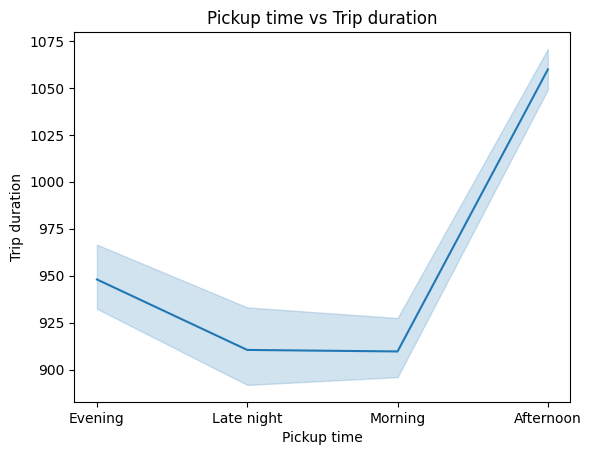

In [52]:
# Chart - 14 visualization code
sns.lineplot(x=nyc_df['pickup_time'],y=nyc_df['trip_duration'])
plt.xlabel('Pickup time')
plt.ylabel('Trip duration')
plt.title('Pickup time vs Trip duration')

##### 1. Why did you pick the specific chart?

To understand the relation between pickup time and trip duration, a line plot is chosen as trip duration is a continuous variable. It will be easy to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed that trip duration is long during afternoon followed by evening. This may have varied reasons like, there may be traffic due to school buses, any construction activities might be going on, weather conditions and if the area is a tourist spot then it may lead to longer time.

## 2.5 Trips per pickup month number

Text(0.5, 1.0, 'Pickup month number vs Trip duration')

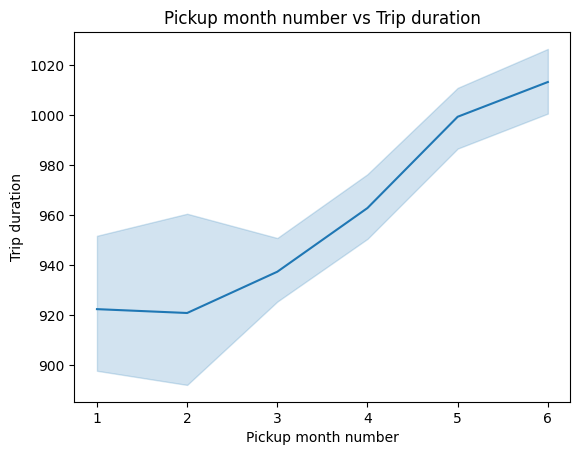

In [53]:
# Chart -15 Visualization code
sns.lineplot(x=nyc_df['pickup_month_number'],y=nyc_df['trip_duration'])
plt.xlabel('Pickup month number')
plt.ylabel('Trip duration')
plt.title('Pickup month number vs Trip duration')

##### 1. Why did you pick the specific chart?

To understand the relation between trip duration and pickup month number, a line plot is chosen as trip duration is continous variable. It will be easy to analyse the pattern.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed that the trip duration is increasing from February and in june, we notice that there are longer trips happening. During the summer, more people might be on vacation or taking different routes to work, affecting overall traffic patterns. Also, construction activities, weather conditions can also be the reason.

## 2.6 Distance travelled by vendors

Text(0.5, 1.0, 'Distance vs Vendor id')

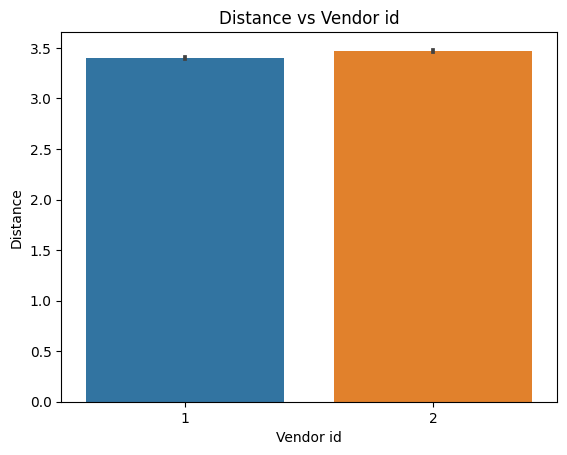

In [54]:
# Chart -16 Visualization code
sns.barplot(y='distance',x='vendor_id',data=nyc_df)
plt.xlabel('Vendor id')
plt.ylabel('Distance')
plt.title('Distance vs Vendor id')

##### 1. Why did you pick the specific chart?

To visulaize the relation between distance and vendor id, a bar chart is chosen as vendor id is categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot, we observe that the distance is distributed almost similarly among both the id's.

##2.7 Passenger count vs distance

Text(0.5, 1.0, 'passenger count vs distance')

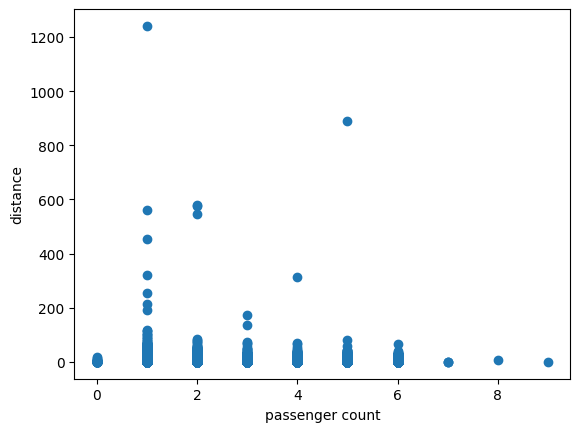

In [55]:
# Chart -17 Visualization code
plt.scatter(x=nyc_df['passenger_count'], y=nyc_df['distance'])
plt.xlabel('passenger count')
plt.ylabel('distance')
ax.set_title('passenger count vs distance')

##### 1. Why did you pick the specific chart?

To understand the relation among passenger count and distance, a scatter plot is chosen, as both are continuous variables. It will be easy to visualise the pattern.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is clear longer distance is travelled by 1 or 2 or 5 passengers.

##2.8 Distance travelled per day

Text(0.5, 1.0, 'pickup day namae vs distance')

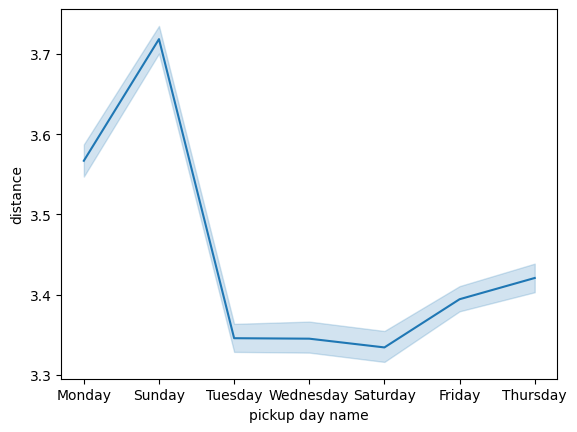

In [56]:
# Chart -18 Visualization code
sns.lineplot(x='pickup_dayname',y='distance',data=nyc_df)
plt.xlabel('pickup day name')
plt.ylabel('distance')
ax.set_title('pickup day namae vs distance')

##### 1. Why did you pick the specific chart?

To understand on what day the distance travelled is long, a line plot is chosen as distance is continous variable. It will be easy to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we notice that on sunday the distance travelled is long followed by monday compared to other days. This is because sunday is holiday for most of them, so, almost everyone will be heading to vacation beacuse of which the distance travelled is long.

##2.9 Distance travelled per time of the day

Text(0.5, 1.0, 'pickup time of the day vs distance')

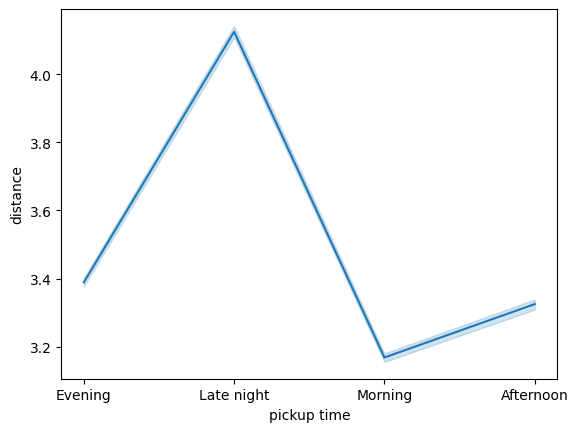

In [57]:
# Chart -19 Visualization code
sns.lineplot(x='pickup_time',y='distance',data=nyc_df)
plt.xlabel('pickup time')
plt.ylabel('distance')
ax.set_title('pickup time of the day vs distance')

##### 1. Why did you pick the specific chart?

To visualize the relation between pickup time and distance, a line plot is chosen as distance is continuous variable. It will be easy to understand the pattern.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observe that during late nights or early mornings is when distances are the longest. This may indicate that people are starting their out-of-town vacations early in the day.

## 2.10 Distance travelled per month

Text(0.5, 1.0, 'pickup month number vs distance')

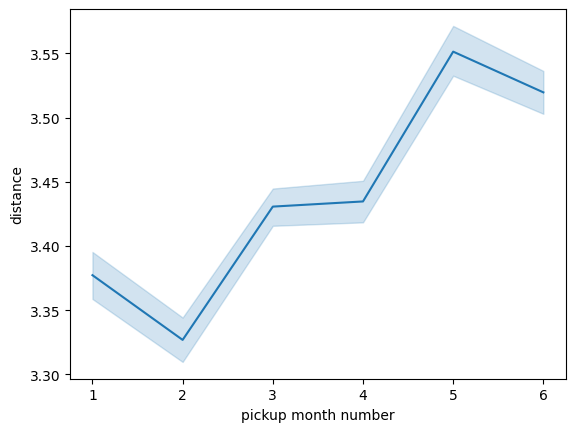

In [58]:
# Chart - 20 Visualization code
sns.lineplot(x='pickup_month_number',y='distance',data=nyc_df)
plt.xlabel('pickup month number')
plt.ylabel('distance')
ax.set_title('pickup month number vs distance')

##### 1. Why did you pick the specific chart?

To understand in which month the distance travelled is long, a line plot is chosen as distance is continous variable. It will be easy to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed distance travelled is kept on increasing from Febraury and reached highest in the month of may. This is due to the holidays they get during summer, Hence people travel out-doors which leads to long distance.

##2.11 Vendor id vs Passenger count

Text(0.5, 1.0, 'vendor id vs passenger count')

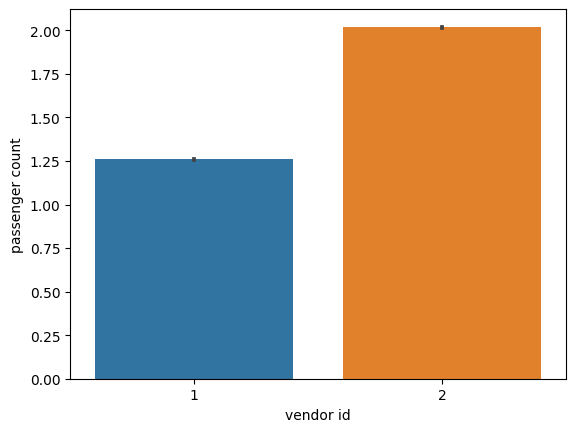

In [59]:
# Chart - 21 Visualization code
sns.barplot(y='passenger_count',x='vendor_id',data=nyc_df)
plt.xlabel('vendor id')
plt.ylabel('passenger count')
ax.set_title('vendor id vs passenger count')

##### 1. Why did you pick the specific chart?

To understand passenger count among vendor id's, a bar plot is chosen as vendor id is categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we notice that vendor id 1 takes rides mostly for 1 passenger whereas vendor id 2 takes rides for 2 passengers.

## ***5. Feature Engineering & Data Pre-processing***

##1. Multicollinearity - It occurs when independent variables in regression are correlated, which cause problems when we fit the model and predict the results.Hence, it is removed using variance infaltion factor.

## Distribution plots of all numerical variables including mean and median

In [63]:
numeric_features = nyc_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'pickup_month_number', 'dropoff_month_number', 'pickup_daynum',
       'dropoff_daynum', 'pickup_hour', 'dropoff_hour', 'pickup_weekday',
       'dropoff_weekday', 'trip_duration_split'],
      dtype='object')

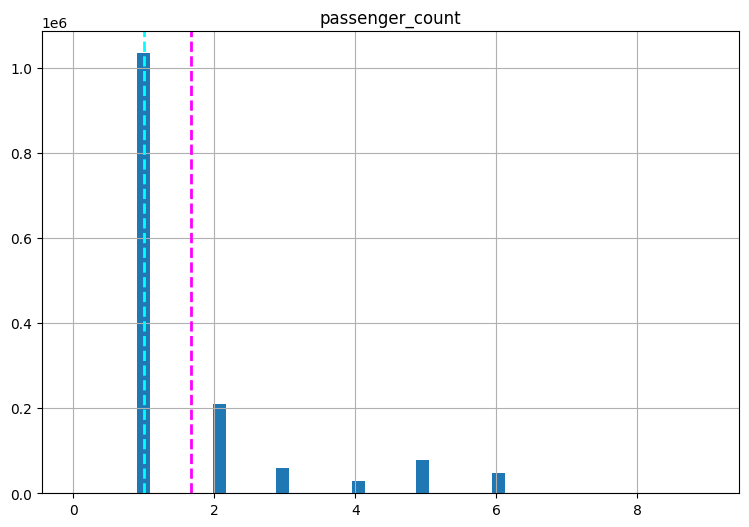

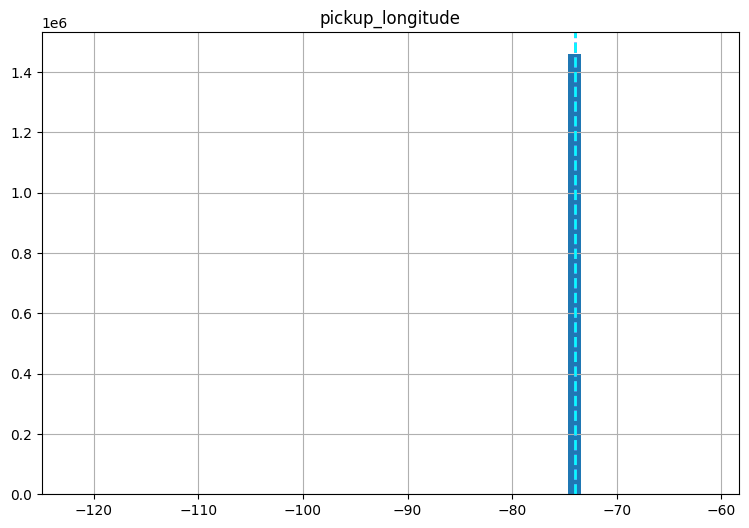

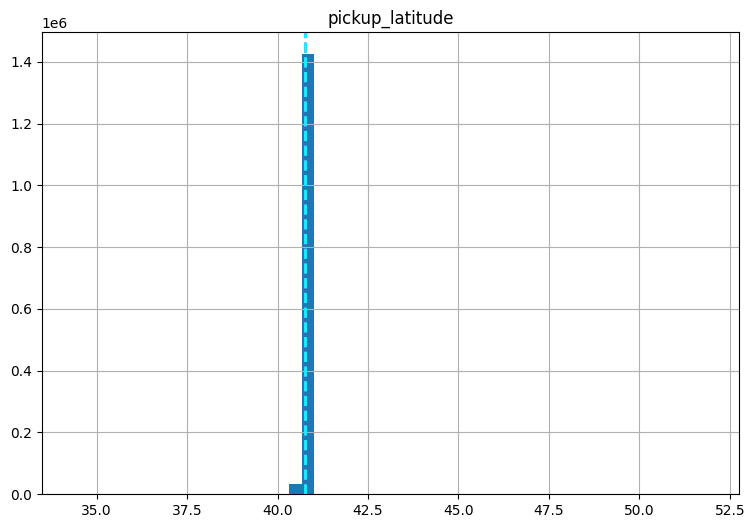

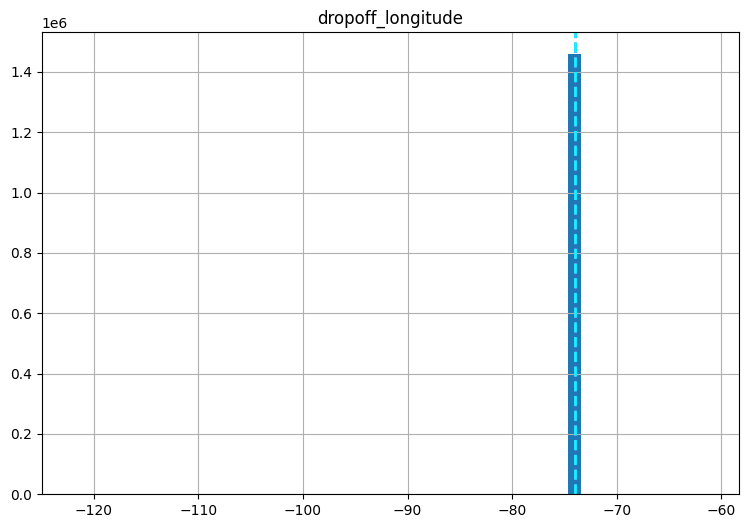

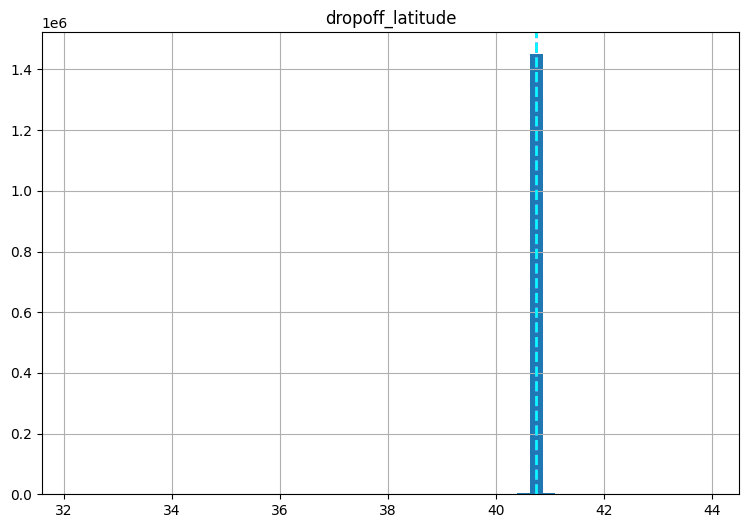

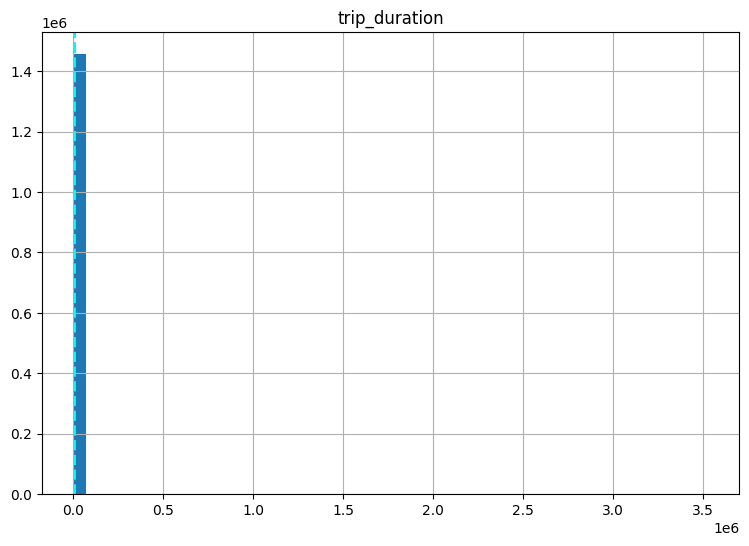

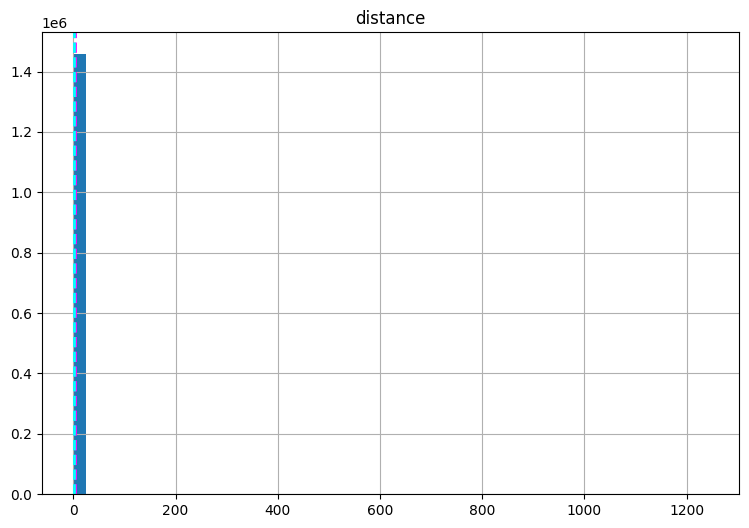

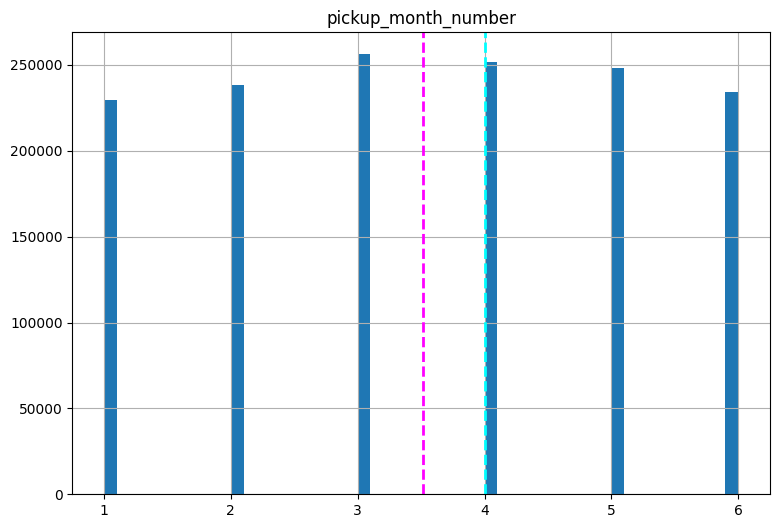

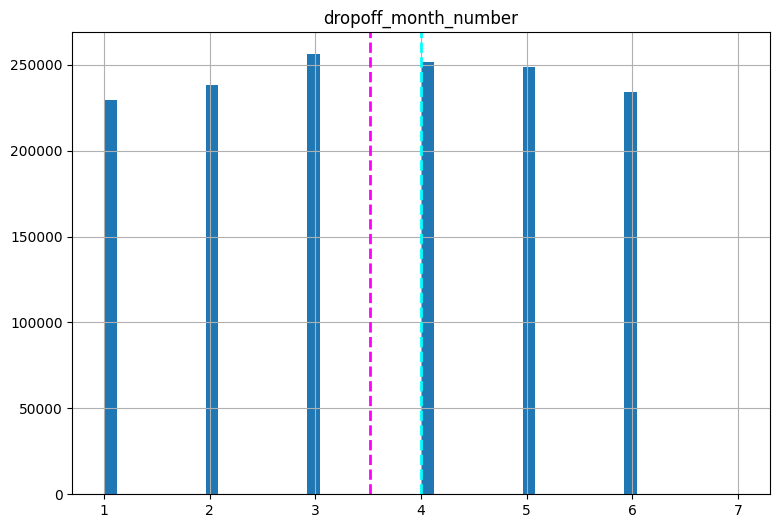

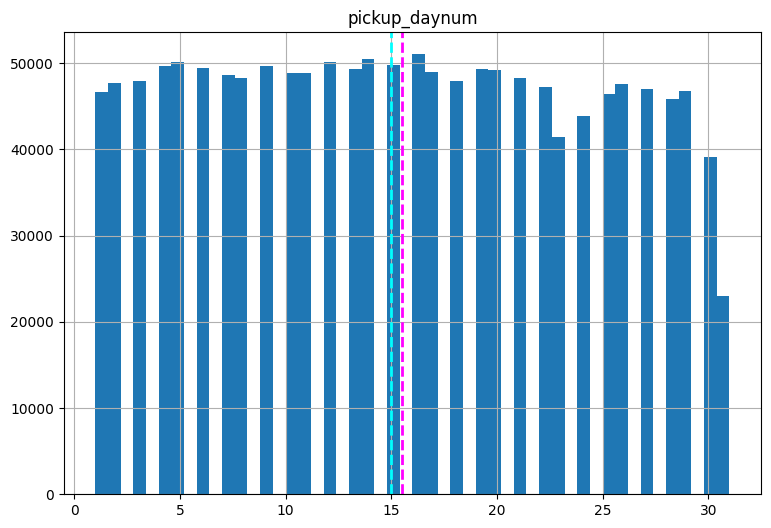

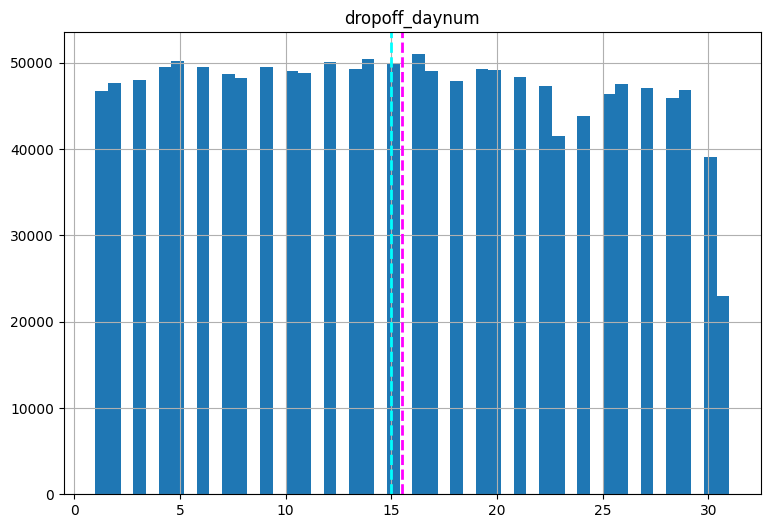

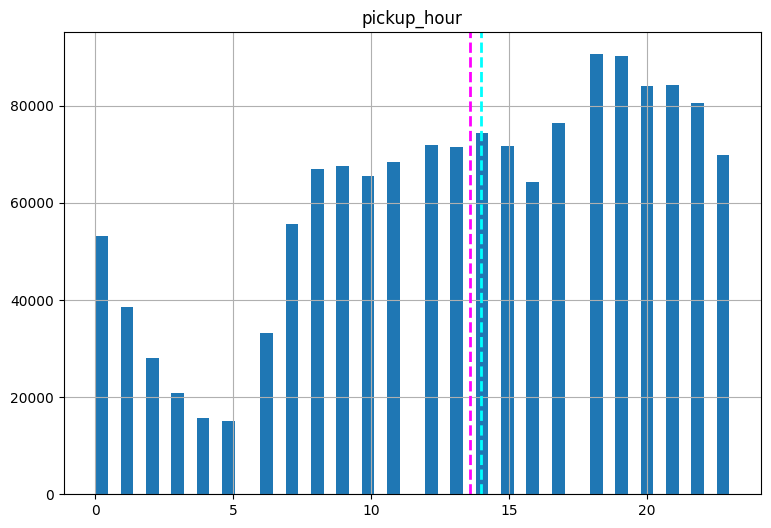

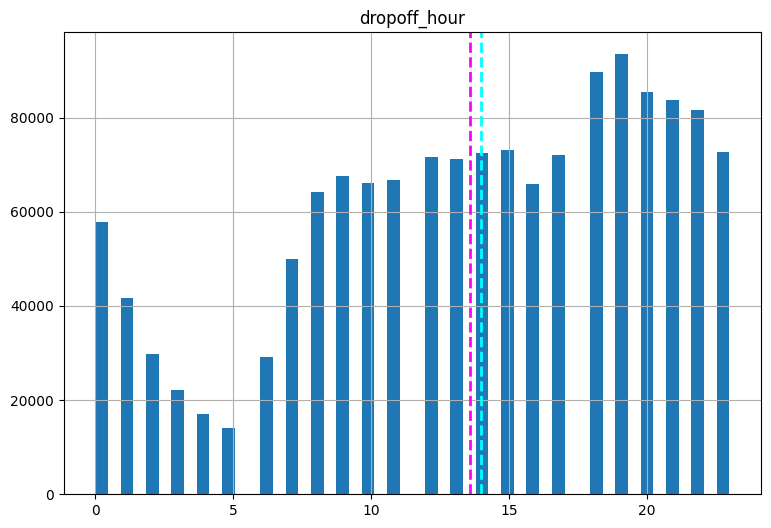

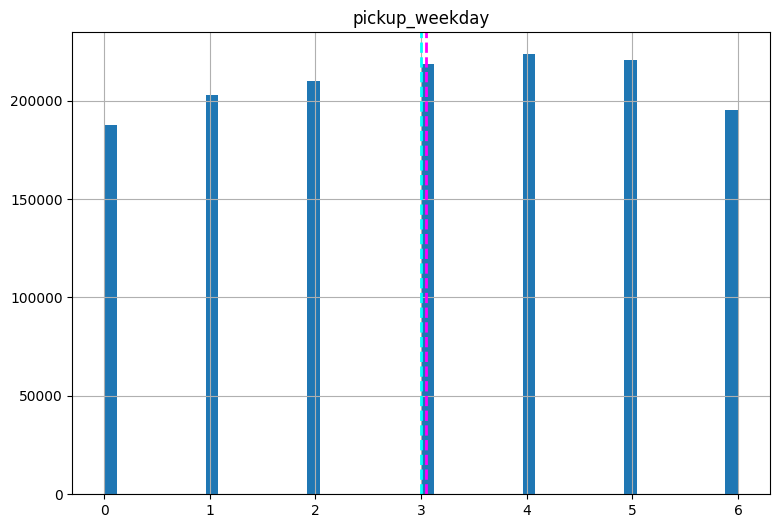

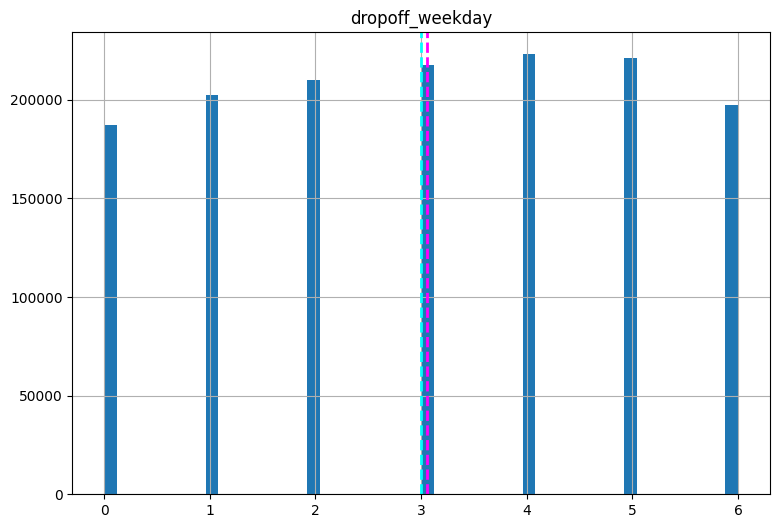

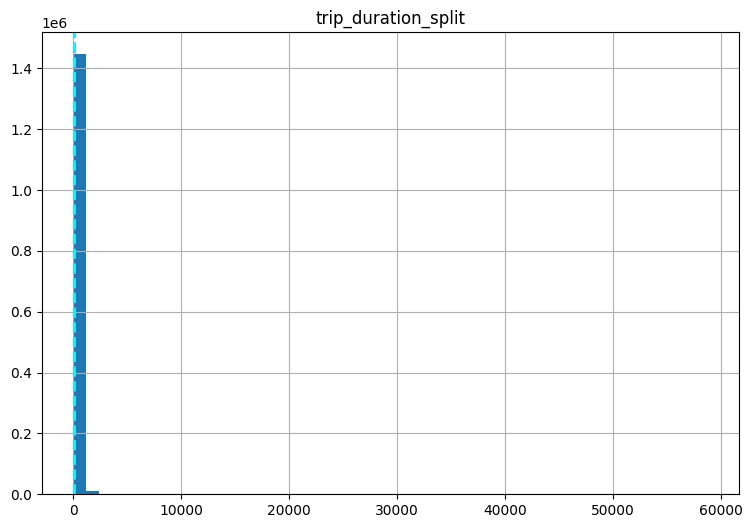

In [64]:
# Distribution plots of each numeric variable except car_id as it doesn't effect the  price
for i in numeric_features[1:]:

  #figure size
  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  #accessing each numeric variable
  feature = nyc_df[i]

  #plotting histogram
  feature.hist(bins = 50, ax = ax) # bins are intervals

  #Mean of the variable is plotted
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)  #axvline is for vertical line

  #Median of the variable is plotted
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)

  #displays the title
  ax.set_title(i)
plt.show()

In [65]:
numeric_features = list(numeric_features)
numeric_features.remove('trip_duration')

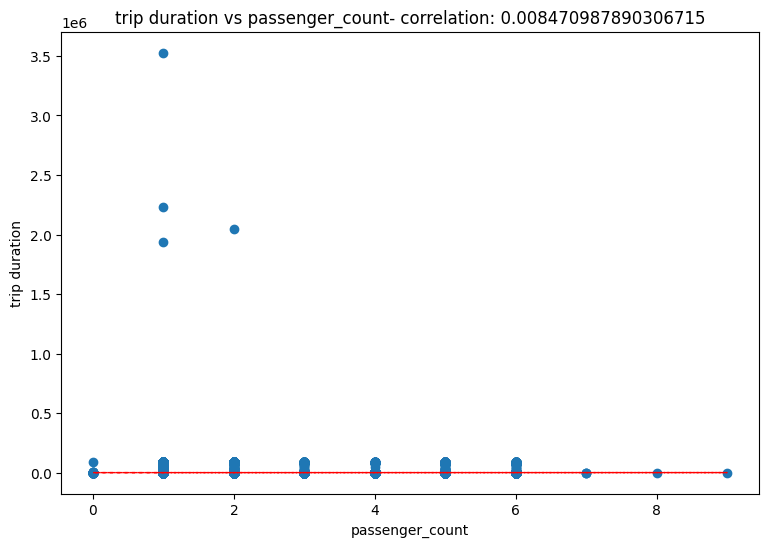

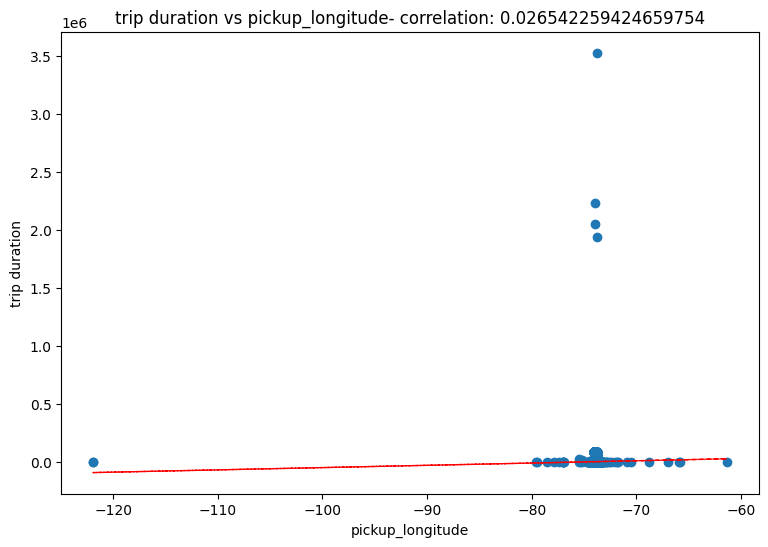

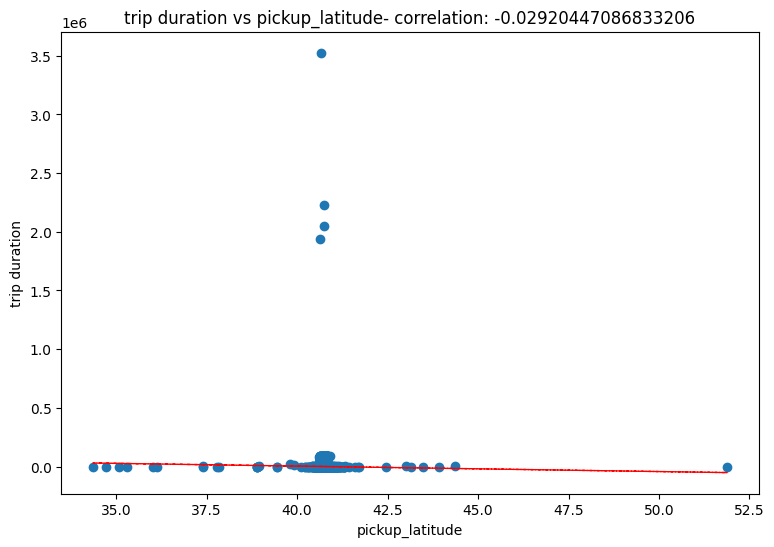

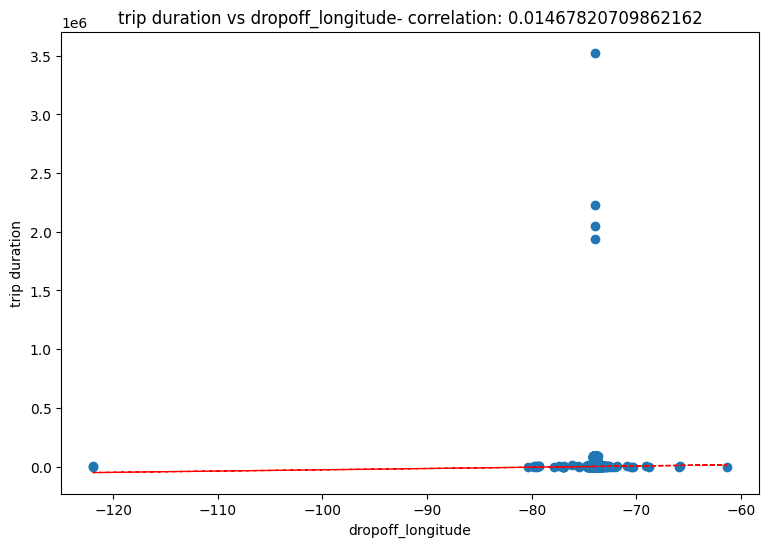

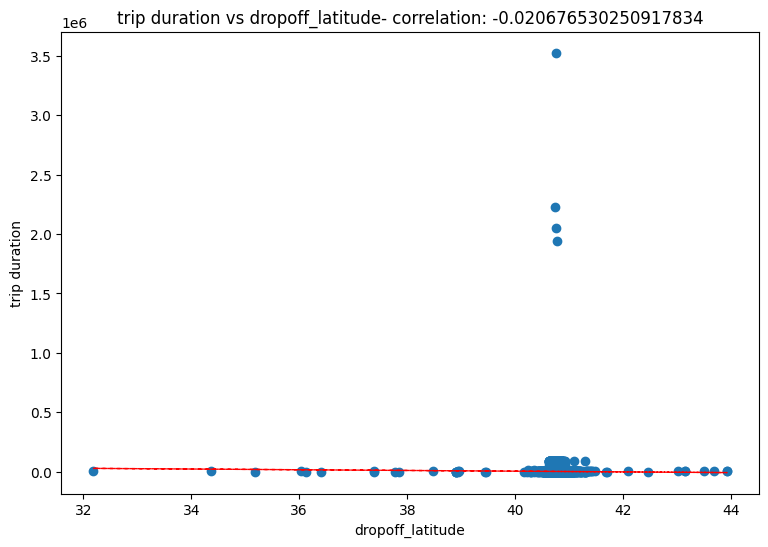

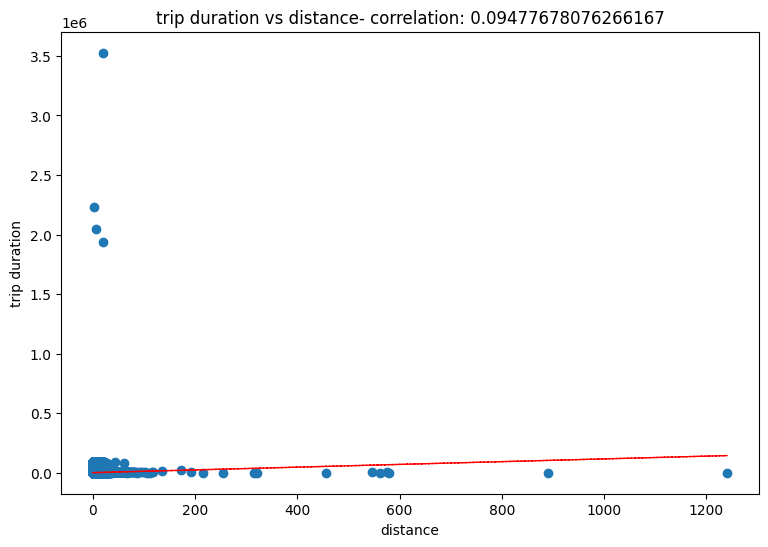

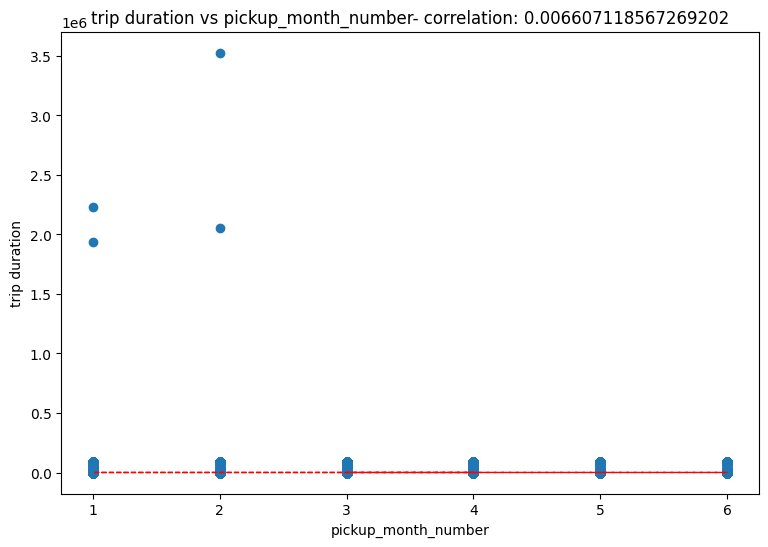

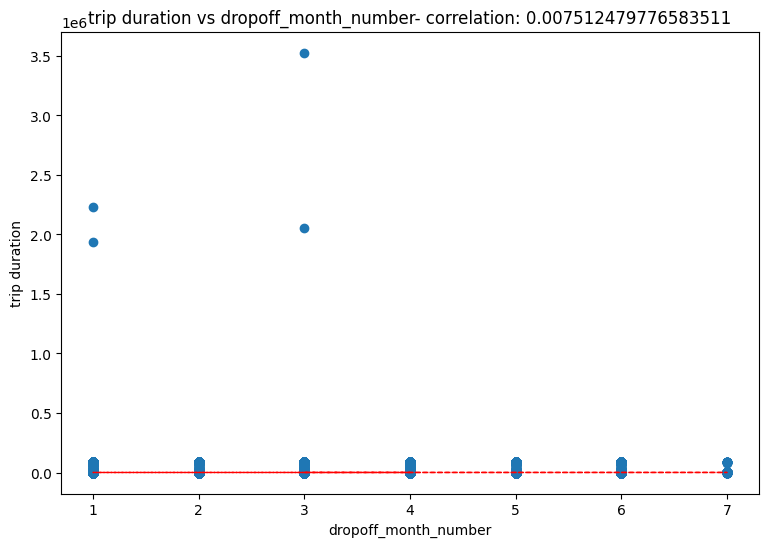

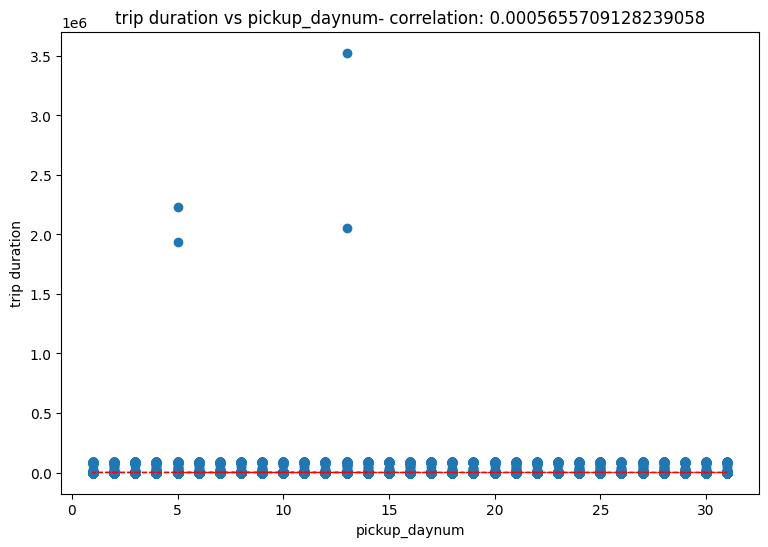

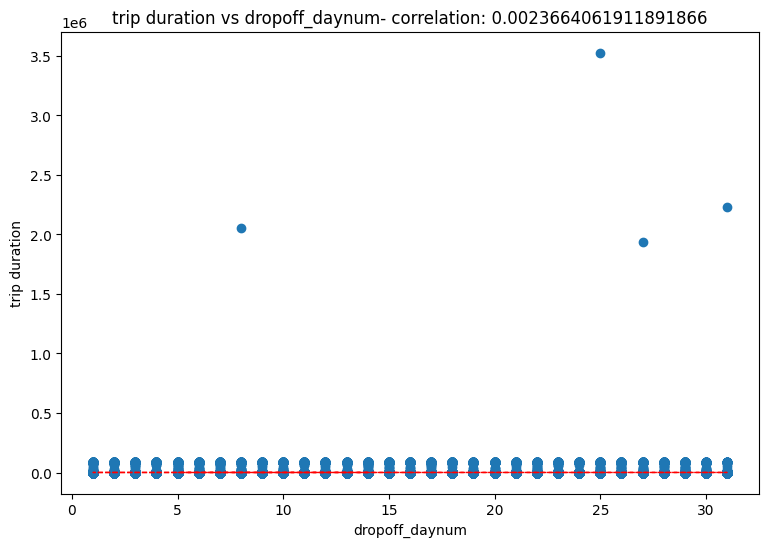

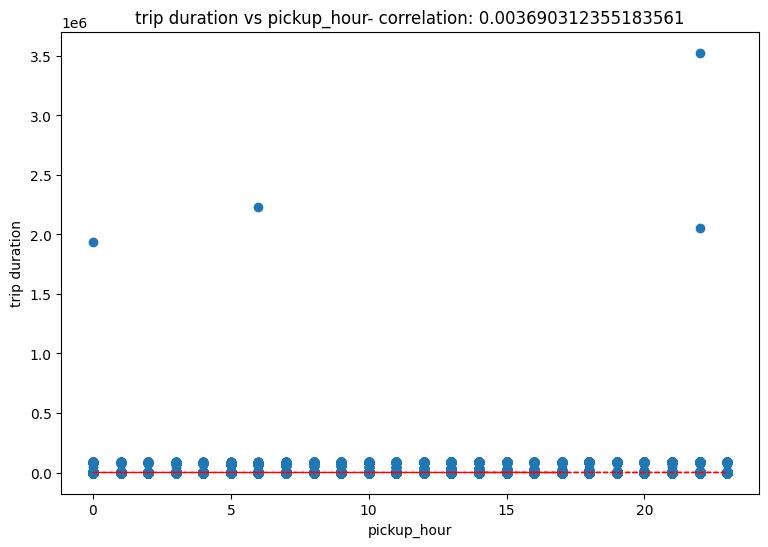

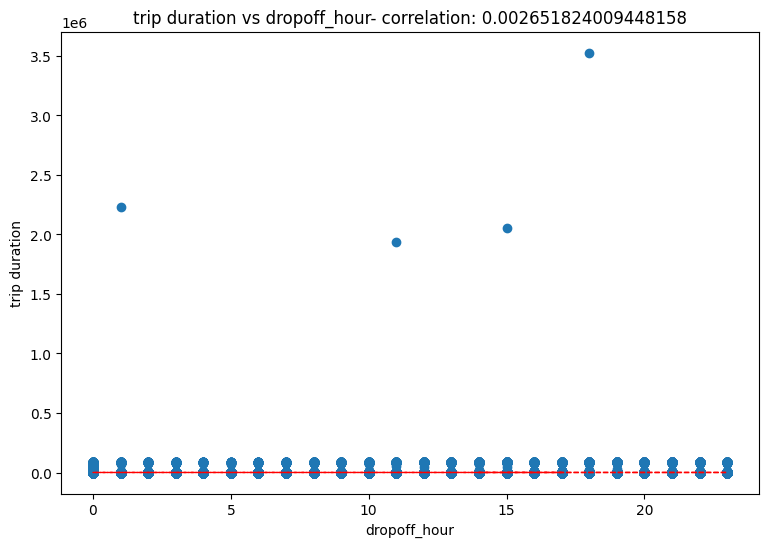

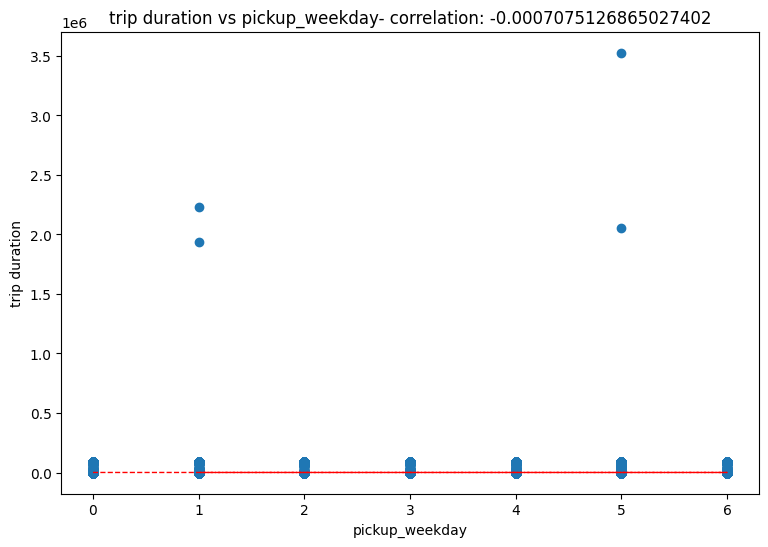

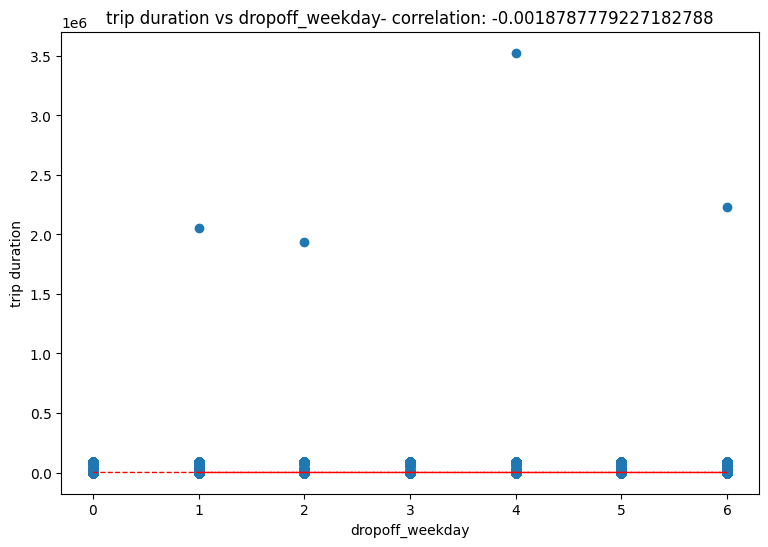

In [66]:
#plotting price vs other independent variables

for i in numeric_features[1:-1]:

    #figure size
    fig = plt.figure(figsize=(9, 6))

    #gca -> get current axis
    ax = fig.gca()

    #assigning numerical variable
    feature = nyc_df[i]

    #assigning price to a variable
    label = nyc_df['trip_duration']

    #calculating correlation
    correlation = feature.corr(label)

    #plotting scatter plot
    plt.scatter(x=feature, y=label)
    plt.xlabel(i)
    plt.ylabel('trip duration')
    ax.set_title('trip duration vs ' + i + '- correlation: ' + str(correlation))

    #creating a polynomial equation of degree 1
    z = np.polyfit(nyc_df[i], nyc_df['trip_duration'], 1)

    #poly1d -> represents polynomial equation of degree 1 or less
    y_hat = np.poly1d(z)(nyc_df[i])

    # plotting predicted line
    plt.plot(nyc_df[i], y_hat, "r--", lw=1)

plt.show()

In [67]:
nyc_df[nyc_df.columns[1:]].corr()['trip_duration'][:]

passenger_count         0.008471
pickup_longitude        0.026542
pickup_latitude        -0.029204
dropoff_longitude       0.014678
dropoff_latitude       -0.020677
trip_duration           1.000000
distance                0.094777
pickup_month_number     0.006607
dropoff_month_number    0.007512
pickup_daynum           0.000566
dropoff_daynum          0.002366
pickup_hour             0.003690
dropoff_hour            0.002652
pickup_weekday         -0.000708
dropoff_weekday        -0.001879
trip_duration_split     0.638066
Name: trip_duration, dtype: float64

From the above plots and correlations obtained, we notice that distance, pickup_longitude, pickup_latitude, drop_off latitude, dropoff_longitude, pickup_month_number, dropoff_month_number, dropoff_daynum, pickup_hour, and dropoff_hour are having significant correlation with trip duration.

<Axes: >

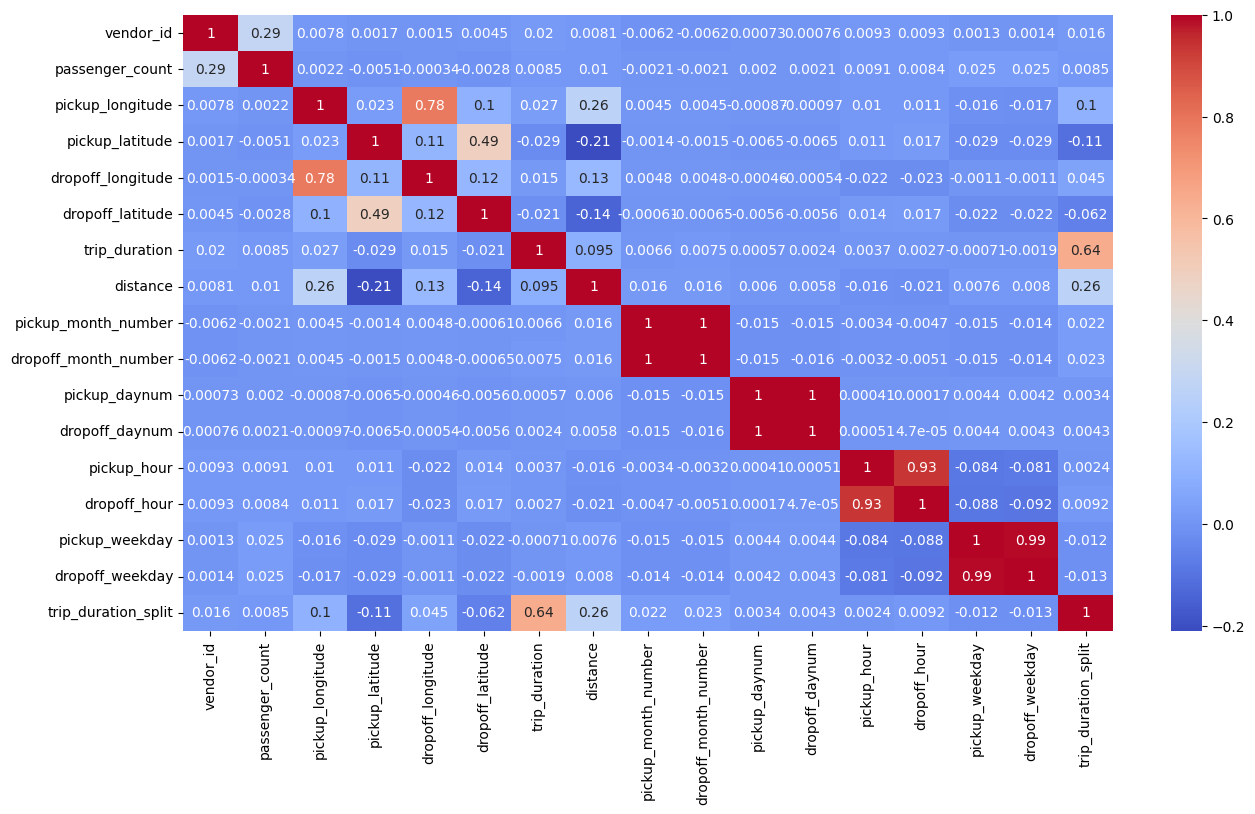

In [68]:
# Heatmap
fig = plt.figure(figsize=(15, 8))
correlation = nyc_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

From the heatmap, we conclude that dropoff_hour, dropoff_daynum, dropoff_month_number, dropoff_weekday and trip_duration_split are strongly correlated to pickup_hour, pickup_daynum, pickup_month_number, and trip_duration respectively. Hence, they can be removed from the dataset during building a model.

To understand whether there is a correlation among the numerical variables, we apply variance inflation factor.

In [69]:
#Creating a function to apply vif on the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):

  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return (vif)

In [70]:
cal_vif(nyc_df[[i for i in nyc_df.describe().columns if i not in ['vendor_id','trip_duration_split', 'trip_duration', 'pickup_month_number', 'dropoff_month_number', 'pickup_daynum', 'dropoff_daynum','pickup_hour', 'dropoff_hour', 'pickup_weekday', 'dropoff_weekday']]])

,variables,VIF
0,passenger_count,2.604403e+00
1,pickup_longitude,2.920249e+06
2,pickup_latitude,1.681608e+06
3,dropoff_longitude,2.727573e+06
4,dropoff_latitude,1.477306e+06
5,distance,1.709102e+00


We take all the variables here, as all of them are correlated to target variable.

In [71]:
Numeric_features = ['passenger_count', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance']

In [72]:
#Assigning all categorical variables to a variable
categorical_features = nyc_df.describe(include = ['object', 'category']).columns

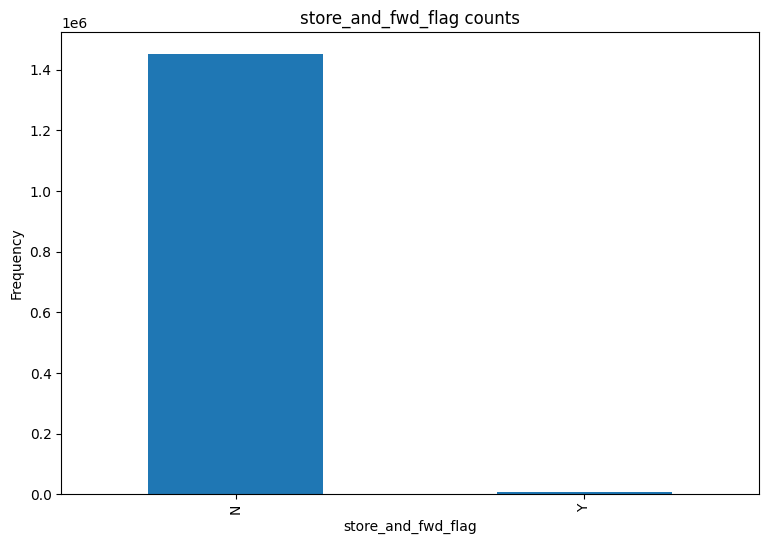

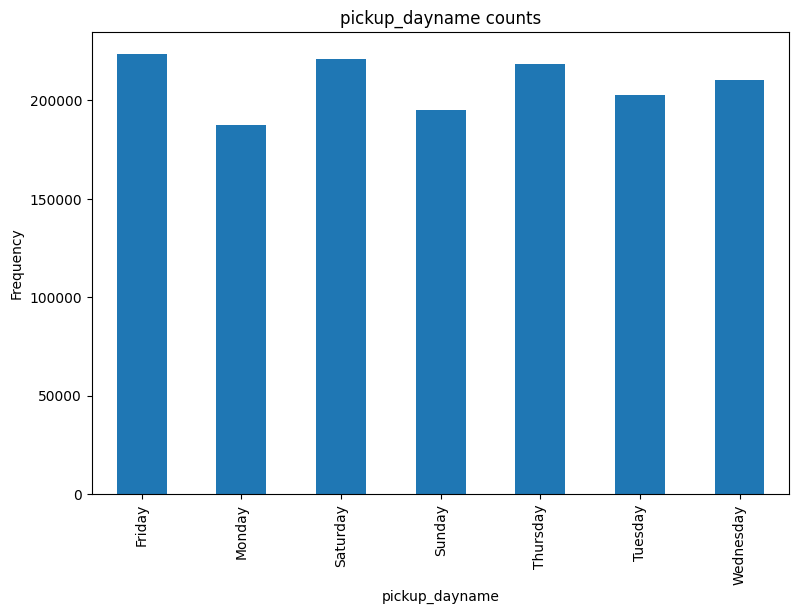

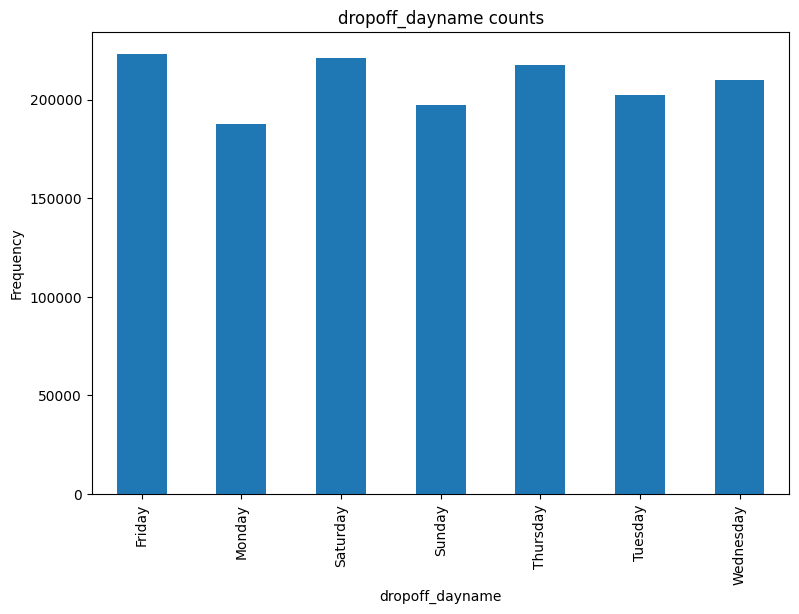

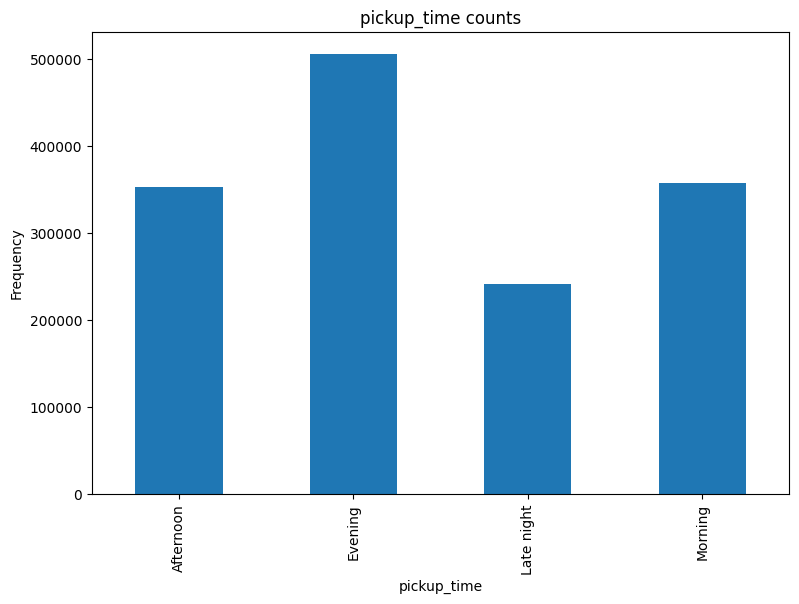

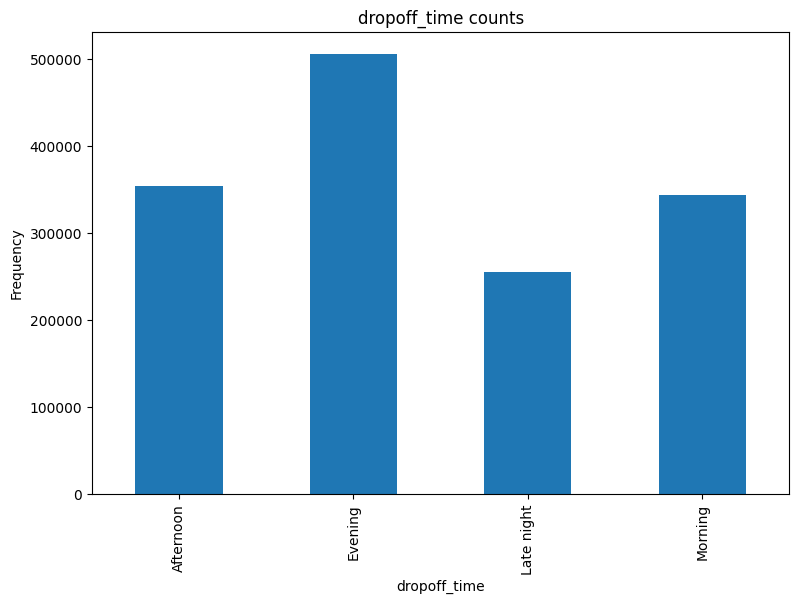

In [73]:
#Visualizations for categorical variables
for i in categorical_features:

  #figure size
  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  #assigning numerical variable
  counts = nyc_df[i].value_counts().sort_index()

  #plotting bar plot
  counts.plot(kind = 'bar')
  ax.set_xlabel(i)
  ax.set_ylabel('Frequency')
  ax.set_title(i + ' ' + 'counts')

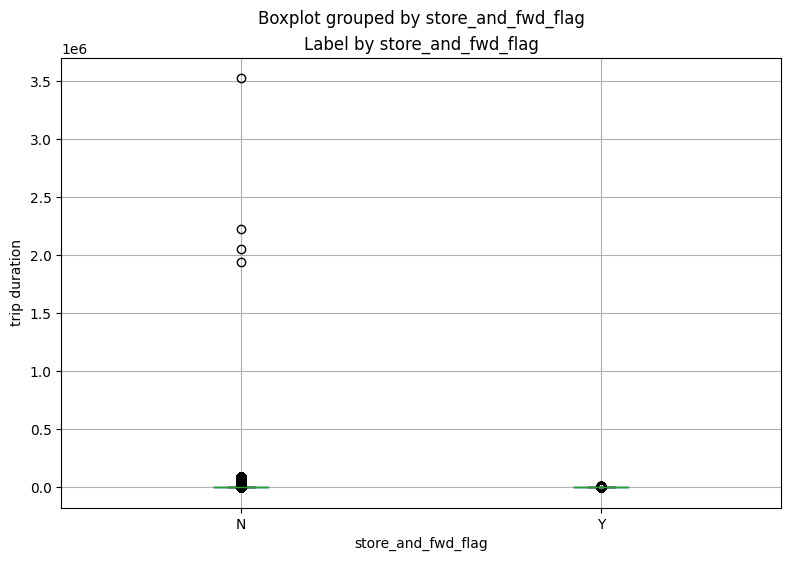

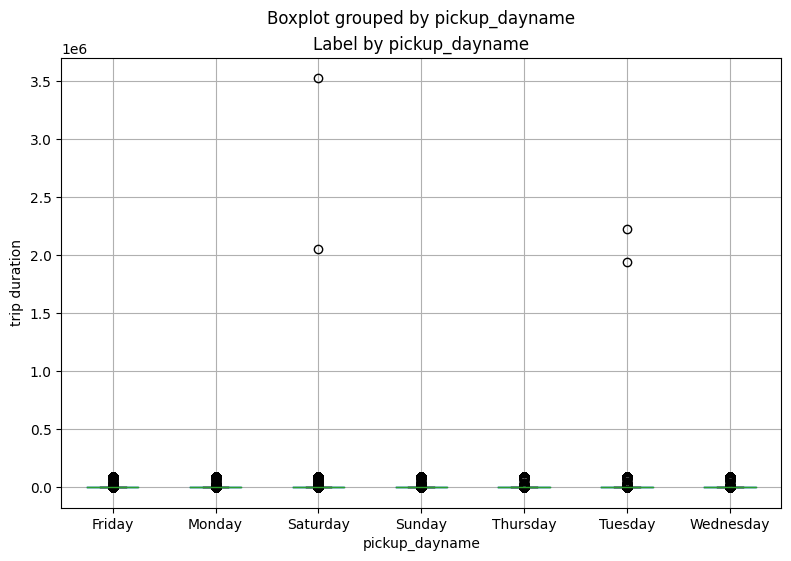

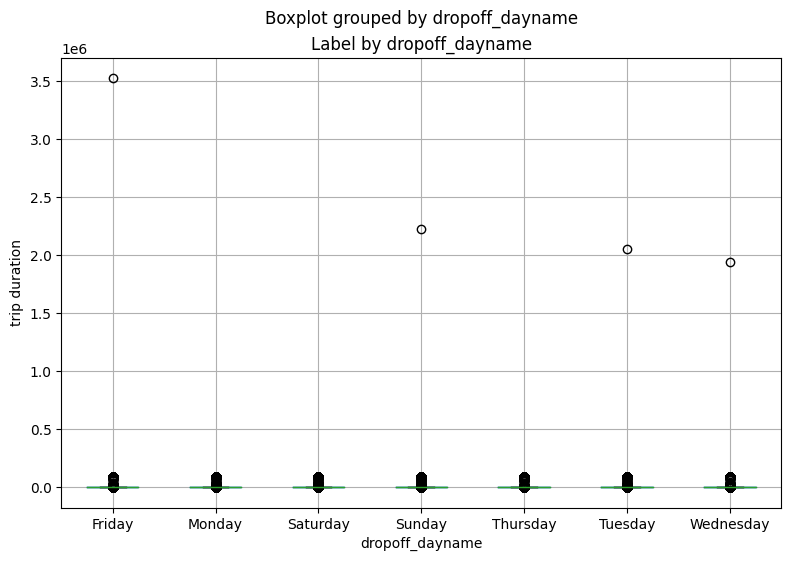

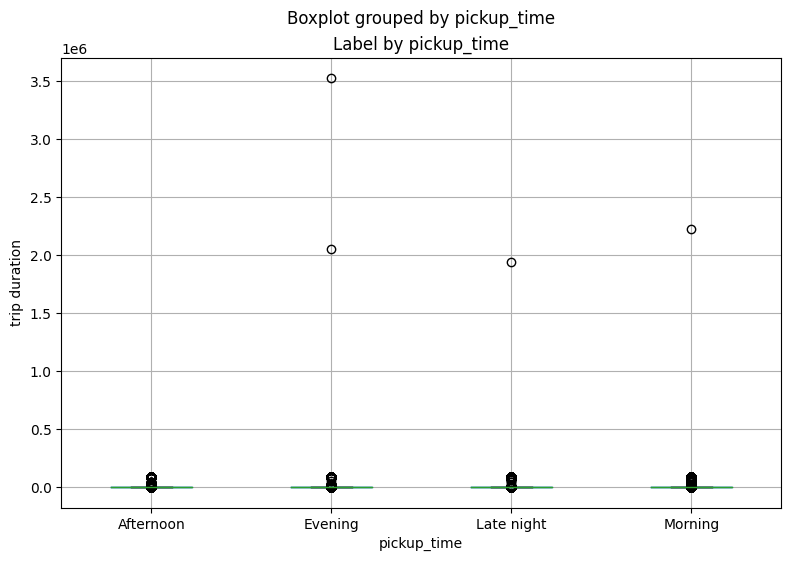

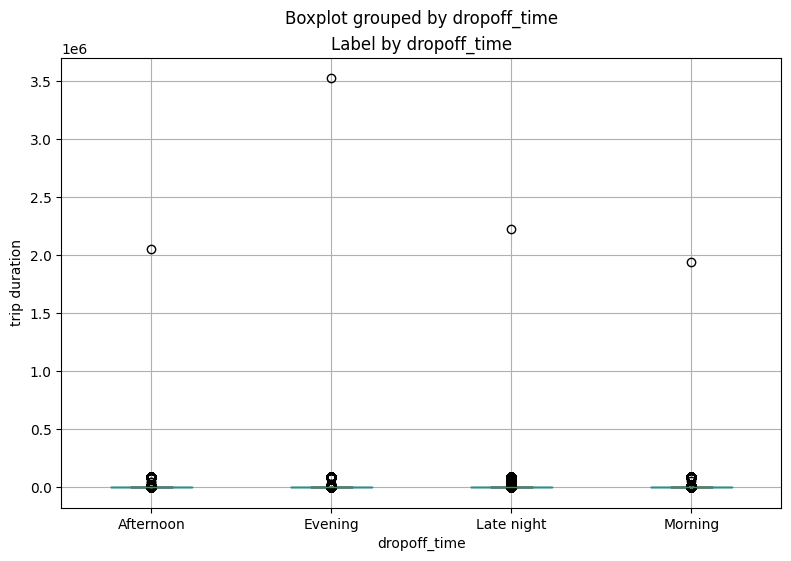

In [74]:
# plotting categorical variables with trip duration

for i in categorical_features:

  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  #plotting box plot
  nyc_df.boxplot(column = 'trip_duration', by = i, ax = ax)
  ax.set_xlabel(i)
  ax.set_ylabel('trip duration')
  ax.set_title('Label by ' + i)

### 2. Handling Missing Values

In [75]:
# Handling Missing Values & Missing Value Imputation
nyc_df.isnull().sum()

vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration           0
distance                0
pickup_month_number     0
dropoff_month_number    0
pickup_dayname          0
dropoff_dayname         0
pickup_daynum           0
dropoff_daynum          0
pickup_hour             0
dropoff_hour            0
pickup_weekday          0
dropoff_weekday         0
pickup_time             0
dropoff_time            0
trip_duration_split     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As there are no missing or null values in the dataset, imputation is not required

### 3. Handling Outliers

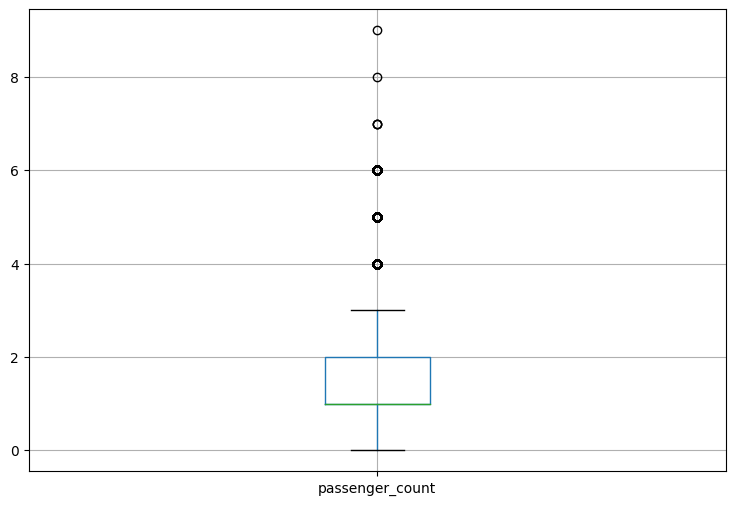

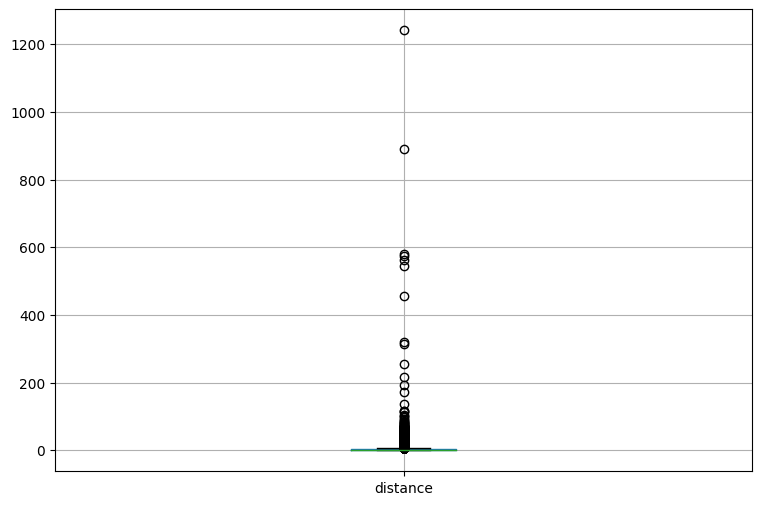

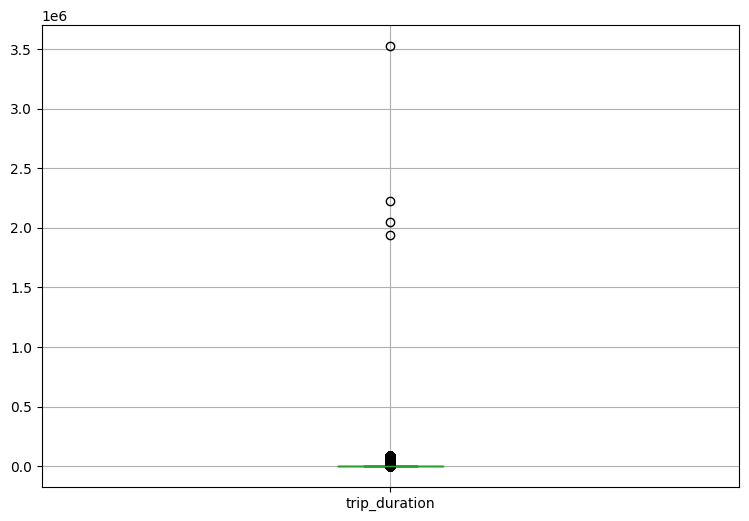

In [76]:
# Handling Outliers & Outlier treatments
columns = ['passenger_count', 'distance', 'trip_duration']

for i in columns:

  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  #plotting box plot
  nyc_df.boxplot(column = i, ax = ax)



From the above boxplots, we notice that there are outliers in passenger count, distance, and trip duration variables. Hence we treat them using quantile method. Outliers are nothing but those points which doesn't follow the trend.

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Outliers are treated using the quantile method and procedure is given below.
* Divide the data into three parts (Quartiles)
 * Q1 - 25th percentile
 * Q2 - 50th percentile
 * Q3 - 75th percentile
* With the three quartiles, calculate interquartile range (IQR) = Q3 - Q1
* Now set the maximum and minimum limits,
 * Minimum limit -> Q1 - (IQR * 1.5)
 * Maximum limit -> Q3 + (IQR * 1.5)
* Tha data which doesn't fall in between maximum and minimum limits is removed.



In [77]:
# First quantile of the trip duration (Q1)
trip_duration_Q1 = nyc_df['trip_duration'].quantile(0.25)
print('First quantile', trip_duration_Q1)

# Second quantile of the trip duration (Q2)
trip_duration_Q2 = nyc_df['trip_duration'].quantile(0.5)
print('Second quantile', trip_duration_Q2)

# Third quantile of the trip duration(Q3)
trip_duration_Q3 = nyc_df['trip_duration'].quantile(0.75)
print('Third quantile', trip_duration_Q3)

# Calculating inter quartile range(IQR)

IQR = trip_duration_Q3 - trip_duration_Q1

# Maximum limit
trip_duration_max = trip_duration_Q3 + (1.5*IQR)
print('Maximum value of trip duration is', trip_duration_max)

#Minimum limit
trip_duration_min = trip_duration_Q1 - (1.5*IQR)
print('Minimum value of trip duration is', trip_duration_min)


First quantile 397.0
Second quantile 662.0
Third quantile 1075.0
Maximum value of trip duration is 2092.0
Minimum value of trip duration is -620.0


In [78]:
nyc_df = nyc_df[(nyc_df['trip_duration'] > 0) & (nyc_df['trip_duration'] < trip_duration_max)]

In [79]:
nyc_df.shape

(1384320, 22)

In [80]:
# First quantile of the trip duration
passenger_count_Q1 = nyc_df['passenger_count'].quantile(0.25)
print('First quantile', passenger_count_Q1)

# # # Second quantile of the trip duration
passenger_count_Q2 = nyc_df['passenger_count'].quantile(0.5)
print('Second quantile', passenger_count_Q2)

# # Third quantile of the trip duration
passenger_count_Q3 = nyc_df['passenger_count'].quantile(0.75)
print('Third quantile', passenger_count_Q3)

# Calculating inter quartile range(IQR)

IQR2 = passenger_count_Q3 - passenger_count_Q1

passenger_count_max = passenger_count_Q3 + (1.5*IQR2)
print('Maximum value of passenger count is', passenger_count_max)

passenger_count_min = passenger_count_Q1 - (1.5*IQR2)
print('Minimum value of passenger count is', passenger_count_min)

First quantile 1.0
Second quantile 1.0
Third quantile 2.0
Maximum value of passenger count is 3.5
Minimum value of passenger count is -0.5


In [81]:
nyc_df = nyc_df[(nyc_df['passenger_count'] > 0) & (nyc_df['passenger_count'] < passenger_count_max)]

In [82]:
nyc_df.shape

(1237987, 22)

In [83]:
# First quantile of the distance
distance_Q1 = nyc_df['distance'].quantile(0.25)
print('First quantile', distance_Q1)

# # # Second quantile of the distance
distance_Q2 = nyc_df['distance'].quantile(0.5)
print('Second quantile', distance_Q2)

# # Third quantile of the distance
distance_Q3 = nyc_df['distance'].quantile(0.75)
print('Third quantile', distance_Q3)

# Calculating inter quartile range(IQR)

IQR3 = distance_Q3 - distance_Q1

distance_max = distance_Q3 + (1.5*IQR3)
print('Maximum value of distance is', distance_max)

distance_min = distance_Q1 - (1.5*IQR3)
print('Minimum value of distance is', distance_min)

First quantile 1.197497120120381
Second quantile 1.9919619004442215
Third quantile 3.4835674136716936
Maximum value of distance is 6.912672853998663
Minimum value of distance is -2.231608320206588


In [84]:
nyc_df = nyc_df[(nyc_df['distance'] > 0) & (nyc_df['distance'] < distance_max)]

In [85]:
nyc_df.shape

(1136749, 22)

## 4. Categorical Encoding


In the backened of any regression model, it performs calculations mathematically. Therefore, whenever we have categorical variables, we convert them to numerical depending on the number of categories it contain. When there are more categories, we use one hot encoding method. It splits the categorical to numerical by assigning the name.

### One hot encoding - One of the technique to convert categorical to numerical.

In [86]:
# We copy the dataset to new dataset before converting the categorical variables
nyc_df_new = nyc_df.copy()

In [87]:
# Categorical variables we have in our dataset
categorical_features

Index(['store_and_fwd_flag', 'pickup_dayname', 'dropoff_dayname',
       'pickup_time', 'dropoff_time'],
      dtype='object')

In [88]:
# Encode your categorical columns
nyc_df_new = pd.get_dummies(nyc_df, columns = ['store_and_fwd_flag', 'pickup_time', 'pickup_dayname'], prefix = ['store_and_fwd_flag', 'Time', 'Day'])

In [89]:
# New dataset first look
nyc_df_new.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month_number,dropoff_month_number,...,Time_Evening,Time_Late night,Time_Morning,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498523,3,3,...,1,0,0,0,1,0,0,0,0,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805510,6,6,...,0,1,0,0,0,0,1,0,0,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485501,4,4,...,1,0,0,0,0,0,0,0,0,1
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188590,3,3,...,0,0,0,0,0,1,0,0,0,0
7,2,1,-73.969276,40.797779,-73.922470,40.760559,1551,5.714989,5,5,...,0,0,1,0,0,1,0,0,0,0


In [90]:
# The information of new dataset
nyc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136749 entries, 0 to 1458643
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1136749 non-null  int64  
 1   passenger_count       1136749 non-null  int64  
 2   pickup_longitude      1136749 non-null  float64
 3   pickup_latitude       1136749 non-null  float64
 4   dropoff_longitude     1136749 non-null  float64
 5   dropoff_latitude      1136749 non-null  float64
 6   trip_duration         1136749 non-null  int64  
 7   distance              1136749 non-null  float64
 8   pickup_month_number   1136749 non-null  int64  
 9   dropoff_month_number  1136749 non-null  int64  
 10  dropoff_dayname       1136749 non-null  object 
 11  pickup_daynum         1136749 non-null  int64  
 12  dropoff_daynum        1136749 non-null  int64  
 13  pickup_hour           1136749 non-null  int64  
 14  dropoff_hour          1136749 non-

#### What all categorical encoding techniques have you used & why did you use those techniques?

From the dataset, we see that store_and_fwd_flag, pickup_time, and pickup_dayname are the categorical variables. As there are more categories, instead of manually assigning integers, we used one hot coding and converted these columns to numerical variables.

### 5. Feature Manipulation & Selection

#### 5.1. Feature Manipulation

In [91]:
nyc_df_new.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'pickup_month_number', 'dropoff_month_number', 'dropoff_dayname',
       'pickup_daynum', 'dropoff_daynum', 'pickup_hour', 'dropoff_hour',
       'pickup_weekday', 'dropoff_weekday', 'dropoff_time',
       'trip_duration_split', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'Time_Afternoon', 'Time_Evening', 'Time_Late night', 'Time_Morning',
       'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [92]:
# Manipulate Features to minimize feature correlation and create new features
# No manipulation is done for the independent variables

#### 5.2. Feature Selection

In [93]:
# Select your features wisely to avoid overfitting
features = ['vendor_id', 'passenger_count', 'distance', 'pickup_latitude',
            'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
            'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Tuesday',
            'Day_Wednesday', 'Day_Thursday', 'Day_Sunday', 'store_and_fwd_flag_Y',
            'store_and_fwd_flag_N', 'pickup_month_number', 'pickup_hour']
features

['vendor_id',
 'passenger_count',
 'distance',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'Day_Friday',
 'Day_Monday',
 'Day_Saturday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Day_Thursday',
 'Day_Sunday',
 'store_and_fwd_flag_Y',
 'store_and_fwd_flag_N',
 'pickup_month_number',
 'pickup_hour']

In [94]:
len(features)

18

In [95]:
final_nyc = nyc_df_new[features]
final_nyc.shape

(1136749, 18)

##### What all feature selection methods have you used  and why?

Using variance inflation factor, we found the  correlation between numerical variables.

##### Which all features you found important and why?

vendor_id, passenger_count, distance, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, Day_Friday, Day_Monday, Day_Saturday, Day_Tuesday, Day_Wednesday, Day_Thursday, Day_Sunday, store_and_fwd_flag_Y,
store_and_fwd_flag_N, pickup_month_number, and pickup_hour are selected for model building. These variables are selected based on the correlation value which is above 0.001.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [96]:
# Transform Your data
#Targert variable trip duration needs to be transformed.
nyc_df_new['trip_duration_hour']=nyc_df['trip_duration']/3600

### 7. Data Scaling

In [97]:
# Scaling your data

from scipy.stats import zscore

# Normalizing the numerical columns
X = nyc_df_new[features].apply(zscore)


In [98]:
# Assigning traget variable to y
y = nyc_df_new['trip_duration_hour']

##### Which method have you used to scale you data and why?

We used zscore to normalize the independent variables.

### 8. Data Splitting

In [99]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(909399, 18)
(227350, 18)


##### What data splitting ratio have you used and why?

The data is split into 80 percent training set and 20 percent test set using train test split command

## ***6. Supervised ML Model Implementation***

### ML Model - 1. Linear Regression
* Linear regression learns whether there is a linear relationship between independent variables and target variable. It gives the coefficients that best fit the data and can make predictions for new inputs given the target variable is continous or numeric.

In [100]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)


In [101]:
# The coefficients given by linear regression
reg.coef_

array([ 1.37234074e-04,  1.67056568e-03,  7.65048478e-02,  5.13925663e-03,
       -8.02949872e-03, -7.79713698e-03, -1.89530089e-02,  8.49188224e+10,
        7.87579255e+10,  8.49269960e+10,  8.17269545e+10,  8.29036258e+10,
        8.39902430e+10,  7.95435338e+10,  3.37653336e+10,  3.37653336e+10,
        4.62334699e-03,  5.13004201e-03])

In [102]:
# The intercept of the Linear equation
reg.intercept_

0.18629214681181216

In [103]:
# Regression score
reg.score(X_train, y_train)

0.49585758125192514

In [104]:
# Predict on the model
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let us create a function (Evaluation_metrics) which calculates MSE, RMSE, r2, and adjusted r2. Also plots the graphs between predicted and actual values. This way it will be easy to calculate in every model.

In [105]:
# Visualizing evaluation Metric Score chart
def Evaluation_metrics(X_test, Y_test, Y_pred):
  MSE = mean_squared_error(Y_test, Y_pred)
  RMSE = math.sqrt(MSE)
  r2 = r2_score(Y_test, Y_pred)
  Adjusted_r2 = 1-(1-r2_score(Y_test, Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print('The MSE calculated is', MSE)
  print('The RMSE calculated is', RMSE)
  print('The r2 score is', r2)
  print('The Adjusted r2 score is', Adjusted_r2)
  plt.figure(figsize=(8,5))
  plt.plot((Y_pred)[:100])
  plt.plot(np.array(Y_test)[:100])
  plt.legend(["Predicted","Actual"])
  plt.show()
  return

The MSE calculated is 0.006150409750111579
The RMSE calculated is 0.07842454813457059
The r2 score is 0.49585758125192514
The Adjusted r2 score is 0.4958476024053071


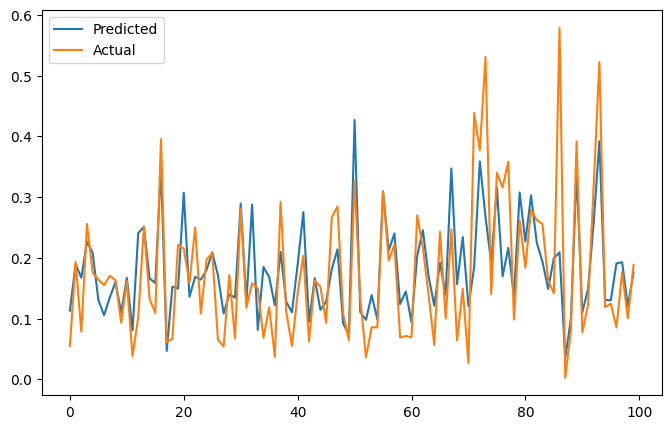

In [106]:
# Evaluation metrics for train dataset
Evaluation_metrics(X_train, y_train, y_pred_train)

The MSE calculated is 0.009426585469600493
The RMSE calculated is 0.09709060443524128
The r2 score is 0.22702631795772632
The Adjusted r2 score is 0.22696511413476883


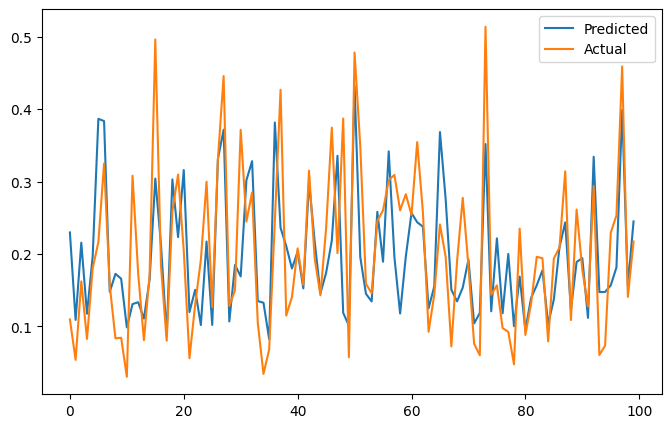

In [107]:
# Evaluation metrics for test dataset
Evaluation_metrics(X_test, y_test, y_pred_test)

When Linear regression model is used to predict the behaviour, it showed MSE as 0.0094 and r2 value as 0.227 for the test dataset which is very low. Hence, the Linear regression model is not suggestable to predict the behaviour of the dataset. Now, we apply cross-validation and check r2 score values.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-Predicted Accuracy: 0.23493592880655878


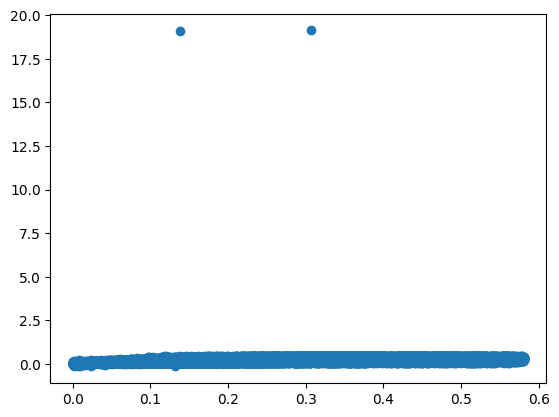

In [108]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Cross validation with cv = 5 folds
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')

cross_val_scores

# Predict on the model
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(LinearRegression(), X_test, y_test, cv=5)
plt.scatter(y_test, predictions)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross-Predicted Accuracy:", accuracy)

##### Which hyperparameter optimization technique have you used and why?

K fold cross validation technique is used for cross validation

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Even after cross validation there is no improvement in r2 score value. Now we try to use regularization and see if there is any improvement.

### ML Model - 2 Decision Tree Regression
*  It works for both continuous as well as categorical output variables.In order to provide meaningful continuous output, decision tree regression evaluates an object's features and trains a model within the structure of a tree to predict data in the future.

In [109]:
# ML Model - 2 Implementation
DT = DecisionTreeRegressor()
# Fit the Algorithm
DT.fit(X_train, y_train)
# Predict on the model
y_pred_DT_test = DT.predict(X_test)
y_pred_DT_train = DT.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The MSE calculated is 1.787673713284514e-39
The RMSE calculated is 4.228089063967922e-20
The r2 score is 1.0
The Adjusted r2 score is 1.0


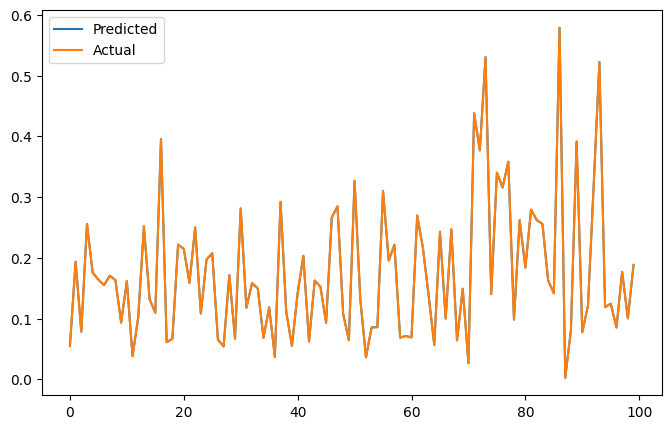

In [110]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for train data
Evaluation_metrics(X_train, y_train, y_pred_DT_train)

The MSE calculated is 0.0071256783484973125
The RMSE calculated is 0.08441373317474658
The r2 score is 0.4156991576802297
The Adjusted r2 score is 0.41565289291580365


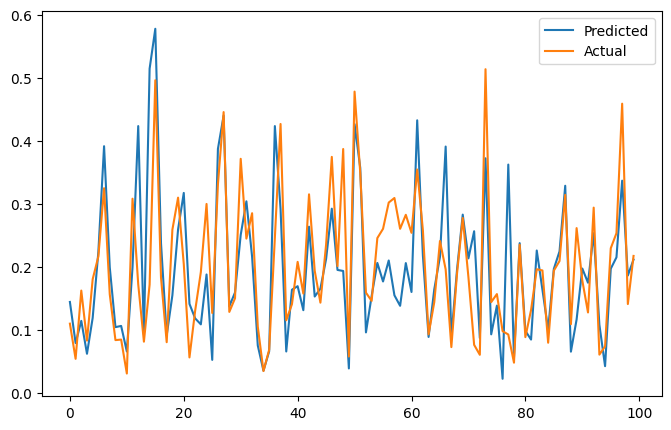

In [111]:
# Evaluation metrics for test data
Evaluation_metrics(X_test, y_test, y_pred_DT_test)

When Decision tree regression model is used to predict the behaviour, it showed MSE as 0.0071 and r2 value of 0.415 for the test dataset which is very low. Hence, the Decision tree regression model is not good enough to predict the behavior of the dataset. Now, we apply cross-validation and check r2 score value and MSE.

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV )
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

DT = DecisionTreeRegressor()

# Grid search
dt_gridsearch = GridSearchCV(estimator=DT,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')
# Fit the Algorithm
dt_gridsearch.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   4.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   7.8s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   5.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   4.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   5.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   6.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   3.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [113]:
dt_gridsearch.best_score_

0.6128473971146325

In [114]:
dt_gridsearch.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10)

In [115]:
dt_optimal_model =dt_gridsearch.best_estimator_

In [116]:
# Predict on the model
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

The MSE calculated is 0.0046602572261516435
The RMSE calculated is 0.0682660766863868
The r2 score is 0.6180037679704736
The Adjusted r2 score is 0.617996206849516


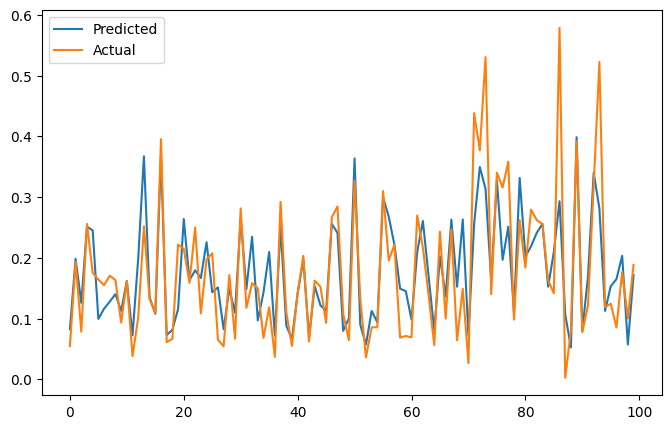

In [117]:
# Evaluation metrics for train data
Evaluation_metrics(X_train, y_train, y_pred_dt_train)

The MSE calculated is 0.004728273046915492
The RMSE calculated is 0.06876243921586474
The r2 score is 0.6122847834391509
The Adjusted r2 score is 0.6122540842652675


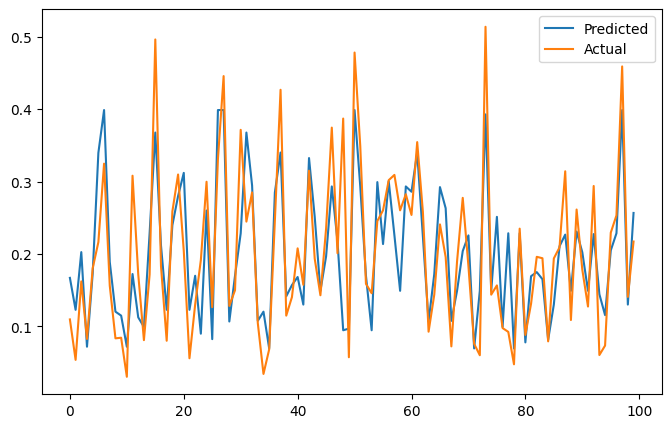

In [118]:
# Evaluation metrics on test data

Evaluation_metrics(X_test, y_test, y_pred_dt_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV technique is used for hyperparameter tuning. Here we considered max_depth as [4,6,8,10], min_samples_leaf as [10,20,30], min_samples_split as [10,16,20] as the values for the hyperparamters. The optimal values obtained for max_depth, min_sample_leaf, and min_sample_split are 10,20,and 20 respectively.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After application of optimal hyper parameters, the r2 score obtained for test data is 0.612 and MSE as 0.0047 which is better when compared to decision tree without hyper parameter tuning and linear regression. But then we need more r2 score to make predictions accurate.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

We cant rely on this model even when hyper parameter tuning is implemented as the accuracy is not better, so this will be a negative impact on business as it doesnot predict the desired results.

### ML Model - 3 Random Forest
* It is an algorithm and bagging technique that uses an ensemble of decision trees to predict continuous target variables.

In [119]:
# ML Model - 3 Implementation
RFR = RandomForestRegressor()

# Fit the Algorithm
RFR.fit(X_train, y_train)

# Predict on the model
y_pred_rfr_test=RFR.predict(X_test)
y_pred_rfr_train=RFR.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The MSE calculated is 0.0004775044969831028
The RMSE calculated is 0.021851876280610385
The r2 score is 0.9608594741077573
The Adjusted r2 score is 0.9608586993717106


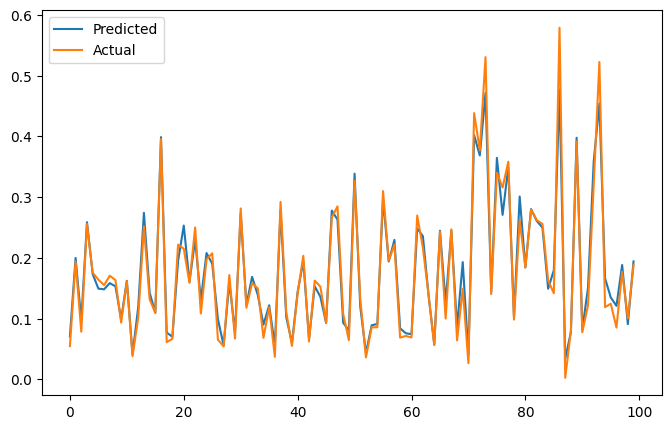

In [120]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for train data
Evaluation_metrics(X_train, y_train, y_pred_rfr_train)

The MSE calculated is 0.003425699044586751
The RMSE calculated is 0.05852947158984737
The r2 score is 0.7190949774335262
The Adjusted r2 score is 0.7190727354585813


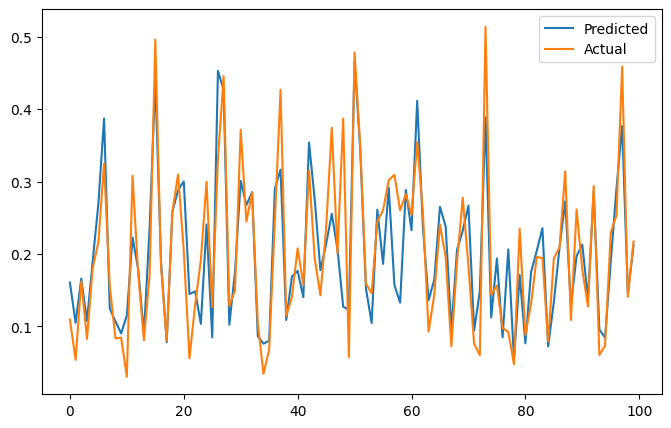

In [121]:
# Evaluation metrics for test data
Evaluation_metrics(X_test, y_test, y_pred_rfr_test)

When Random forest regression model is used to predict the behavior, it showed an r2 value of 0.719 and MSE as 0.0034 for the test dataset which is better compared to previous models. Even though, we apply cross-validation and check r2 score values for better accuracy.

#### 2. Cross- Validation & Hyperparameter Tuning

In [122]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Number of trees
n_estimators = [20,22,24]

# Maximum depth of trees
max_depth = [10, 16]

# Max features
max_features = [0.6]

# Maximum number of samples required at each leaf node
max_samples = [0.75,1.0]

#HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'max_features' : max_features,
              'max_samples' : max_samples}

Rf_grid = GridSearchCV(estimator=RFR, param_grid=param_dict, cv=2, verbose=2)

# Fit the Algorithm
Rf_grid.fit(X_train, y_train)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  33.2s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  48.6s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  49.5s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  48.4s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  40.9s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  50.3s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  48.4s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  59.1s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 1.0min
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 16], 'max_features': [0.6],
                         'max_samples': [0.75, 1.0],
                         'n_estimators': [20, 22, 24]},
             verbose=2)

In [123]:
Rf_grid.best_score_

0.6855663641884315

In [124]:
Rf_grid.best_params_

{'max_depth': 16, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 22}

In [125]:
Random_forest_optimal_model = Rf_grid.best_estimator_

In [126]:
# Predict on the model
Random_forest_optimal_model = Rf_grid.best_estimator_
y_pred_random_forest_test=Random_forest_optimal_model.predict(X_test)
y_pred_random_forest_train=Random_forest_optimal_model.predict(X_train)

The MSE calculated is 0.0031311732447535994
The RMSE calculated is 0.055956887375492925
The r2 score is 0.7433411240445078
The Adjusted r2 score is 0.7433360438142771


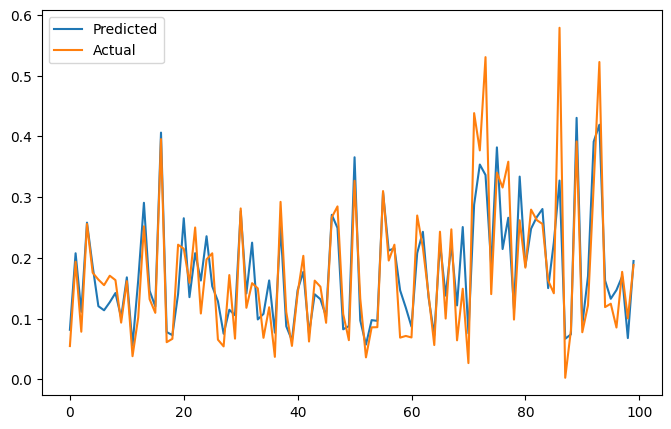

In [127]:
# Evaluation metrics for train data
Evaluation_metrics(X_train, y_train, y_pred_random_forest_train)

The MSE calculated is 0.003810734994408137
The RMSE calculated is 0.061731150924052416
The r2 score is 0.6875222879573766
The Adjusted r2 score is 0.6874975460664037


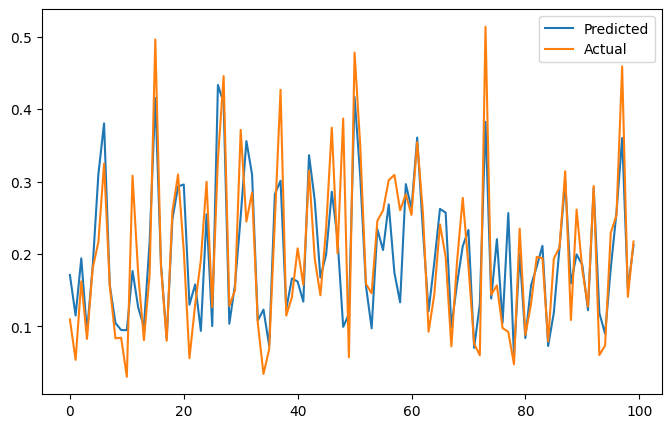

In [128]:
# Evaluation metrics for test data
Evaluation_metrics(X_test, y_test, y_pred_random_forest_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV technique is used for hyperparameter tuning. Here we considered n_estimators as [20,22,24], max_depth as [10,16], max_features as [0.6], max_samples as [0.75,1.0] as the values for the hyperparamters. The optimal values obtained for n_estimators, max_depth, max_features, and max_samples are 16, 0.6, 1, and 24 respectively.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement seen after implementing hyperparameter tuning, Hence we go for another model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

We can't rely on this model even when hyper parameter tuning is implemented as the accuracy is not better, so this will be a negative impact on business as it doesnot predict the desired results.

### ML Model - 4 XGBoost Tree Regression
*  It is an algorithm and boosting technique that learns errors from the base learners and creates a better tree by minimising the errors to predict continuous target variables.

In [129]:
# ML Model - 2 Implementation
xgb_model = xgb.XGBRegressor()

# Fit the Algorithm
xgb_model.fit(X_train, y_train)

# Predict on the model
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The MSE calculated is 0.0033739156530863505
The RMSE calculated is 0.05808541687107316
The r2 score is 0.7234437920224607
The Adjusted r2 score is 0.7234383179502977


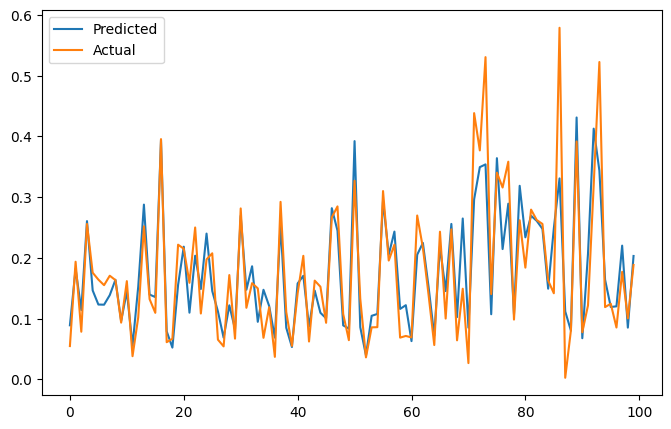

In [130]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for train data
Evaluation_metrics(X_train, y_train, y_pred_xgb_train)

The MSE calculated is 0.003470067760292029
The RMSE calculated is 0.05890728104650586
The r2 score is 0.7154567725228728
The Adjusted r2 score is 0.7154342424759605


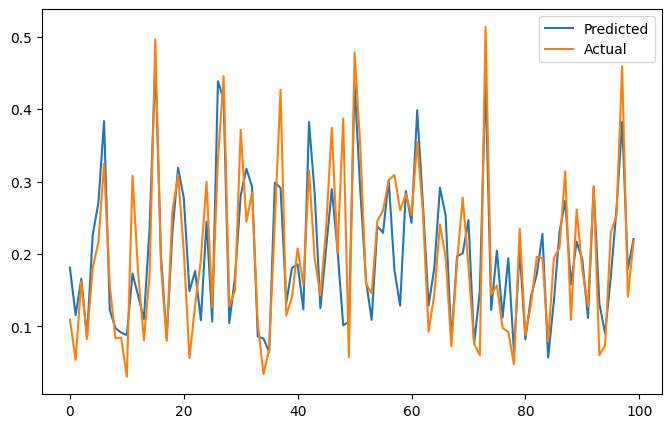

In [131]:
# Evaluation metrics for test data
Evaluation_metrics(X_test, y_test, y_pred_xgb_test)

When XGBoost regression model is used to predict the behaviour, it showed an r2 value of 0.715 and MSE as 0.0034 for the test dataset which is better compared to all the previous models. We further try to increase the accuracy by applying cross-validation and check r2 score, MSE values.

#### 2. Cross- Validation & Hyperparameter Tuning

In [132]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV )
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

# Fit the algorithm
xgb_grid.fit(X_train,y_train)



Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   7.9s
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.8s
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   4.1s
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=  10.6s
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   6.4s
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=  10.5s
[CV] END max_depth=5, min_samples_split=40, n_estimators=120; total time=   7.2s
[CV] END max_depth=5, min_samples_split=40, n_estimators=120; total time=  10.8s
[CV] END max_depth=5, min_samples_split=40, n_estimators=120; total time=   8.3s
[CV] END .max_depth=5, min_samples_split=50, n_estimators=50; total time=   6.6s
[CV] END .max_depth=5, min_samples_split=50, n_estimators=50; total time=   3.9s
[CV] END .max_depth=5, min_samples_split=50, n_e

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [133]:
xgb_grid.best_score_

0.7343693100079435

In [134]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [135]:
xgb_optimal_model =xgb_grid.best_estimator_

In [136]:
# Predict on the model
y_pred_xgbh_test=xgb_optimal_model.predict(X_test)
y_pred_xgbh_train=xgb_optimal_model.predict(X_train)

The MSE calculated is 0.0026268531776385993
The RMSE calculated is 0.0512528358009447
The r2 score is 0.7846796931461737
The Adjusted r2 score is 0.7846754311594097


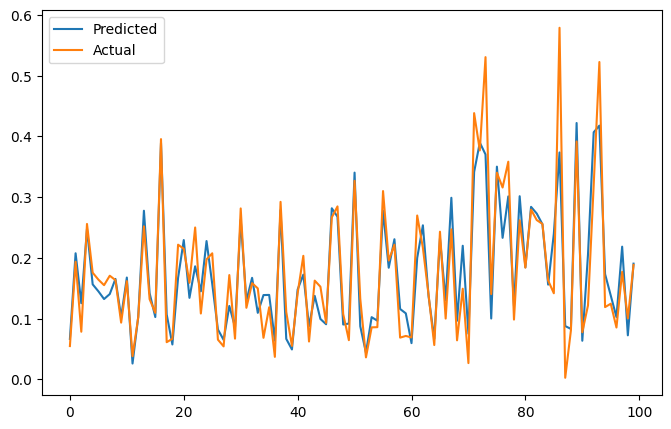

In [137]:
# Evaluation metrics for train data
Evaluation_metrics(X_train, y_train, y_pred_xgbh_train)

The MSE calculated is 0.003205349953542516
The RMSE calculated is 0.056615810102324915
The r2 score is 0.7371634550162527
The Adjusted r2 score is 0.737142643697912


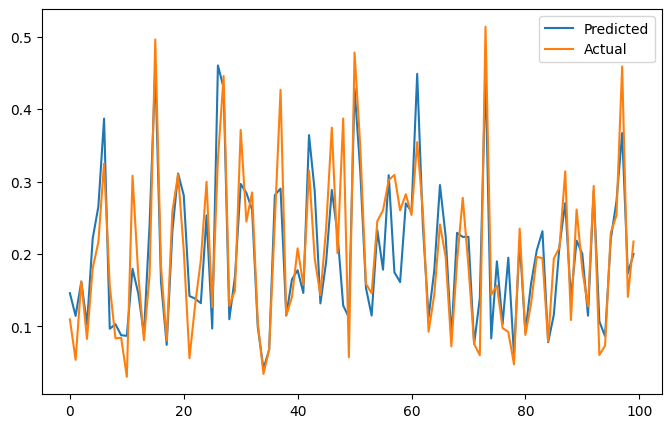

In [138]:
# Evaluation metrics on test data
Evaluation_metrics(X_test, y_test, y_pred_xgbh_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV technique is used for hyperparameter tuning. Here we considered n_estimators as [50,100,120], max_depth as [5,7,9], min_samples_split as [40,50] as the values for the hyperparamters. The optimal values obtained for n_estimators, max_depth, and min_sample_split are 120,9,and 40 respectively.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After application of optimal hyper parameters, the r2 score obtained for test data is improved to 0.737 and MSE as 0.0032 which is better when compared to all the previous models chosen.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Generally Mean squared error (MSE) and r2 score are common evaluation metrics, Therefore we considered them as our evaluation metrics for the following reasons.
*  MSE is sensitive to outliers, large prediction errors will have a major effect on the MSE. Where minimizing significant errors is our top priority, this can work in our favour leading to a positive impact on business.
*  r2 score provides us an understanding of how well the independent variables explain the variability of the dependent variable. It is expressed in percentages, the larger the r2 score,  the more the model predicts accurately.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Here in the given project, we tried linear regression, decision tree, random forest and XGBoost along with cross validation hyper parameter tuning. Among these models when compared the evaluation metrics, we notice that XGBoost gave us the minimum MSE () and better r2 score (). Hence, XGBoost is chosen as final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [141]:
# Extracting feature importance in terms of values for each variable
xgb_optimal_model.feature_importances_

array([0.00492816, 0.00488696, 0.4269501 , 0.02085638, 0.02246378,
       0.04208627, 0.02385217, 0.01861194, 0.05814821, 0.0978804 ,
       0.01833385, 0.01587392, 0.02017727, 0.12463334, 0.00486458,
       0.        , 0.01643128, 0.0790214 ], dtype=float32)

In [142]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [143]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
2,distance,0.426950
13,Day_Sunday,0.124633
9,Day_Saturday,0.097880
17,pickup_hour,0.079021
8,Day_Monday,0.058148
5,dropoff_latitude,0.042086
6,dropoff_longitude,0.023852
4,pickup_longitude,0.022464
3,pickup_latitude,0.020856
12,Day_Thursday,0.020177


<Axes: title={'center': 'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

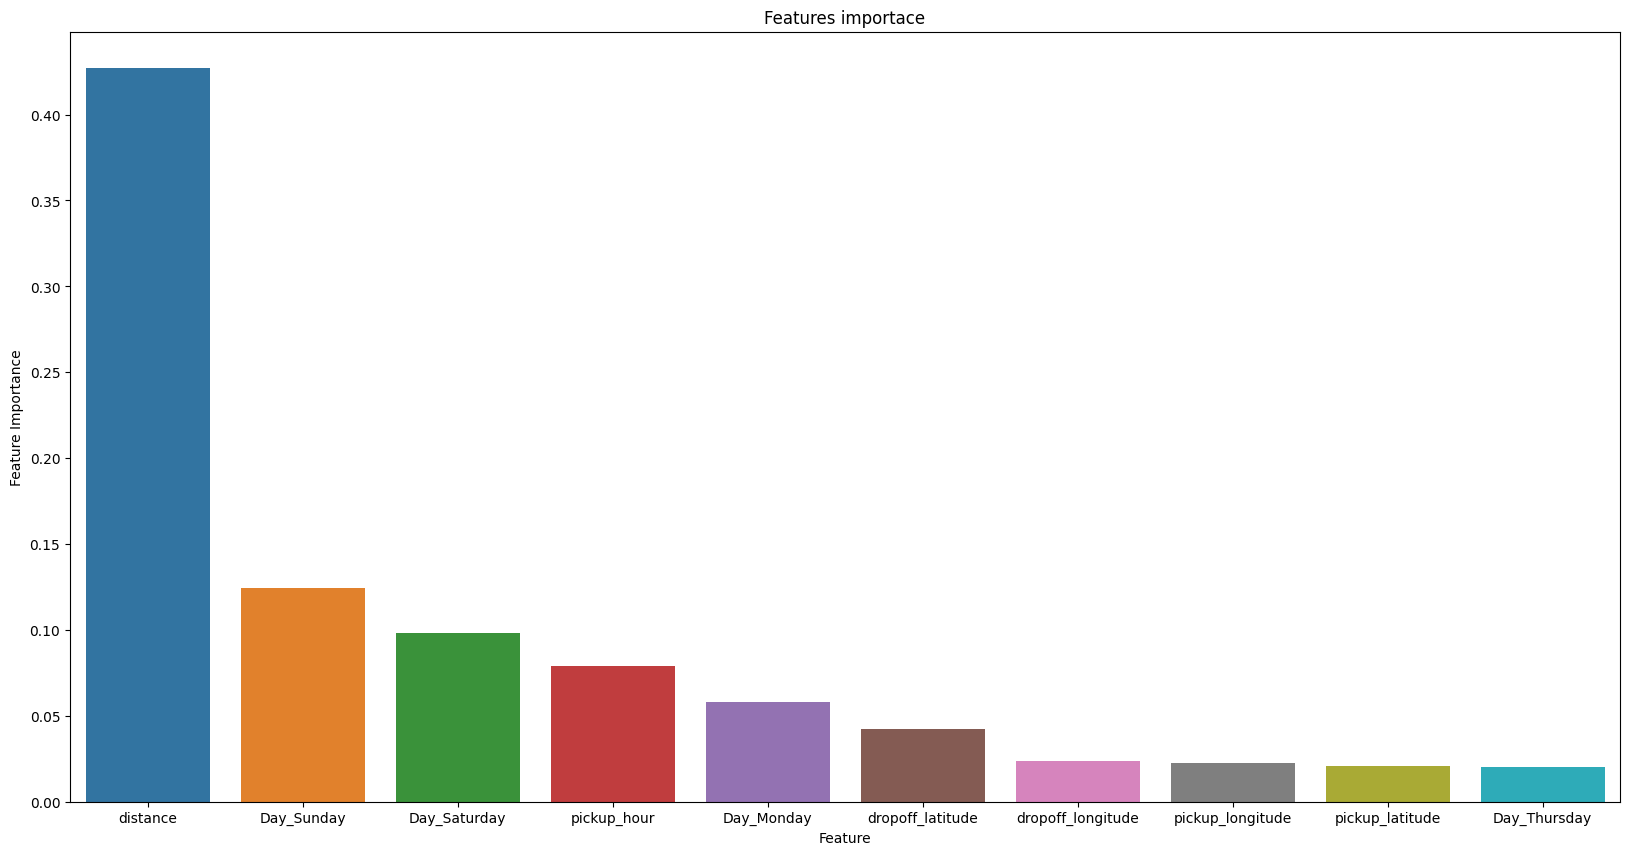

In [155]:
# plotting the graph of top 10 features which effect trip duration
plt.figure(figsize=(20,10))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

From the above plot, we see that distance is the most important variable for trip duration as they are directly proportional. Also, along with that Day_sunday, Day_saturday, pickup_hour, day_monday, and dropoff_latitude are the other top 5 variables which effect trip duration.

# **Conclusion**

**1. CONCLUSION FROM EDA**

After performing few analysis for the given dataset, it can be concluded that

*   From the analysis, trip duration column is plotted by applying log transformation on it which shows a normal distribution.
*   Most of the trips had single passenger.
*   Most of the records in the distance column are noted zero which will lead to a difficult situation when performing data analysis.
*   Evenings are the busiest as we can see that maximum rides are booked around evening.
*   Most of the long rides have taken place on weekends as they are holidays for everyone, people often plan for longer trips.
*   Maximum trips had trip duration of about 30 minutes.

Also, strategies to increase the passengers could be by offering weekly or monthly memberships, giving discounts on weekends, and ensuring safety so that customers are more attracted to book taxi.






**2. CONCLUSION FROM MODEL IMPLEMENTATION**

First we performed feature engineering which involves
* In multicollinearity section, we finalised numerical columns with the help of correlation values and variance inflation factor.
* Then we found outliers in passenger_count, distance, and trip_duration columns, using quantile method we removed them.
* Then performed categorical encoding for store_and_fwd_flag and pickup_dayname.
* vendor_id, passenger_count, distance, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, Day_Friday, Day_Monday, Day_Saturday, Day_Tuesday, Day_Wednesday, Day_Thursday, Day_Sunday, store_and_fwd_flag_Y, store_and_fwd_flag_N, pickup_month_number, and pickup_hour are selected for model building.
* Now coming to the model implementation and their respective evaluation metrics for test data. Here we considered MSE and r2 score as evaluation metrics.
1.   Linear regression
* MSE - 0.0094
* r2 score - 0.227
2. Decision tree
* MSE - 0.00712
* r2 score - 0.415
3. Decision tree with cross validation
* MSE - 0.0047
* r2 score -  0.612
4. Random forest
* MSE - 0.0034
* r2 score -  0.719
5. Random forest with cross validation
* MSE - 0.0047
* r2 score -  0.612
6. XGBoost
* MSE - 0.0034
* r2 score -  0.715
7. XGBoost with cross validation
* MSE - 0.0032
* r2 score -  0.737

Therefore, On comparing the models built, we noticed that XGBoost performed better with low MSE and high r2 score. Also, looking at the feature importance, we can say that distance had the highest contribution followed by day_sunday, day_saturday, pick_hour, and day_monday.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***